In [1]:
# 📊 LOAD PREVIOUSLY SAVED OBJECTIVE PERFORMANCE DATA
# Loading all DataFrames from CSV files saved in previous analysis

import pandas as pd
import numpy as np
import os
from pathlib import Path

print("🔄 Loading previously saved objective performance data...")

# Define the results directory path
results_dir = "../../data-analysis/results"  # Adjust path relative to current notebook location
alt_results_dir = "../data-analysis/results"  # Alternative path

# Check which path exists
if os.path.exists(results_dir):
    data_path = results_dir
elif os.path.exists(alt_results_dir):
    data_path = alt_results_dir
else:
    # Try to find the results directory
    possible_paths = [
        "./data-analysis/results",
        "../results",
        "../../results",
        "../../../data-analysis/results"
    ]
    data_path = None
    for path in possible_paths:
        if os.path.exists(path):
            data_path = path
            break

if data_path is None:
    print("❌ Could not find the results directory. Please check the path.")
    print("Expected files:")
    print("  - subject_metrics.csv")
    print("  - before_metrics.csv") 
    print("  - after_metrics.csv")
    print("  - improvement_metrics.csv")
else:
    print(f"📁 Found results directory: {data_path}")
    
    # Load all the saved DataFrames
    try:
        # 1. Main metrics DataFrame
        df_metrics = pd.read_csv(f"{data_path}/subject_metrics.csv")
        print(f"✅ Loaded df_metrics: {df_metrics.shape[0]} rows × {df_metrics.shape[1]} columns")
        
        # 2. Before metrics DataFrame
        df_before = pd.read_csv(f"{data_path}/before_metrics.csv")
        print(f"✅ Loaded df_before: {df_before.shape[0]} rows × {df_before.shape[1]} columns")
        
        # 3. After metrics DataFrame
        df_after = pd.read_csv(f"{data_path}/after_metrics.csv")
        print(f"✅ Loaded df_after: {df_after.shape[0]} rows × {df_after.shape[1]} columns")
        
        # 4. Improvement metrics DataFrame
        df_improvements = pd.read_csv(f"{data_path}/improvement_metrics.csv")
        print(f"✅ Loaded df_improvements: {df_improvements.shape[0]} rows × {df_improvements.shape[1]} columns")
        
        print(f"\n📊 DATA SUMMARY:")
        print("=" * 50)
        print(f"Total records: {len(df_metrics)}")
        print(f"Before records: {len(df_before)}")
        print(f"After records: {len(df_after)}")
        print(f"Improvement records: {len(df_improvements)}")
        print(f"Unique subjects: {df_metrics['subjectId'].nunique()}")
        print(f"Feedback types: {list(df_metrics['feedback_type'].unique())}")
        
        # Display column information
        print(f"\n📋 DATAFRAME COLUMNS:")
        print("-" * 30)
        print(f"df_metrics columns: {list(df_metrics.columns)}")
        print(f"df_improvements columns: {list(df_improvements.columns)}")
        
        # Show first few rows of each DataFrame
        print(f"\n🔍 SAMPLE DATA PREVIEW:")
        print("-" * 30)
        print("df_metrics (first 3 rows):")
        print(df_metrics.head(3))
        
        print(f"\ndf_improvements (first 3 rows):")
        print(df_improvements.head(3))
        
        # Show improvement summary by feedback type
        print(f"\n📈 IMPROVEMENT SUMMARY BY FEEDBACK TYPE:")
        print("-" * 50)
        improvement_summary = df_improvements.groupby('feedback_type')[
            ['pitch_rmse_improvement', 'dynamics_rmse_improvement', 
             'tempo_rmse_improvement', 'pitch_correctness_improvement']
        ].agg(['mean', 'std', 'count'])
        print(improvement_summary)
        
        print(f"\n✅ All DataFrames successfully loaded and ready for analysis!")
        print(f"💡 Available DataFrames: df_metrics, df_before, df_after, df_improvements")
        
    except FileNotFoundError as e:
        print(f"❌ Error loading files: {e}")
        print(f"Please check that all CSV files exist in: {data_path}")
        
    except Exception as e:
        print(f"❌ Unexpected error: {e}")

🔄 Loading previously saved objective performance data...
📁 Found results directory: ../../data-analysis/results
✅ Loaded df_metrics: 56 rows × 15 columns
✅ Loaded df_before: 28 rows × 15 columns
✅ Loaded df_after: 28 rows × 15 columns
✅ Loaded df_improvements: 28 rows × 6 columns

📊 DATA SUMMARY:
Total records: 56
Before records: 28
After records: 28
Improvement records: 28
Unique subjects: 14
Feedback types: ['none', 'feedback']

📋 DATAFRAME COLUMNS:
------------------------------
df_metrics columns: ['subjectId', 'feedback_type', 'timing', 'pitch_rmse', 'mean_subj_pitch', 'std_subj_pitch', 'pitch_bias_hz', 'pitch_inaccuracy_std', 'percent_notes_correct', 'dynamics_rmse', 'dynamics_bias', 'dynamics_inaccuracy_std', 'tempo_rmse', 'tempo_bias', 'tempo_inaccuracy_std']
df_improvements columns: ['subjectId', 'feedback_type', 'pitch_rmse_improvement', 'dynamics_rmse_improvement', 'tempo_rmse_improvement', 'pitch_correctness_improvement']

🔍 SAMPLE DATA PREVIEW:
----------------------------

🎨 Generating publication-ready raw RMSE visualizations with proper sizing and annotation placement...
✅ Loaded experience mapping from: data.json (31 subjects)

📊 Creating Graph 1: Raw RMSE Performance by Feature (independent y-scales, proper sizing)...
📊 Saved: raw_rmse_by_feature_20250831_113147.png


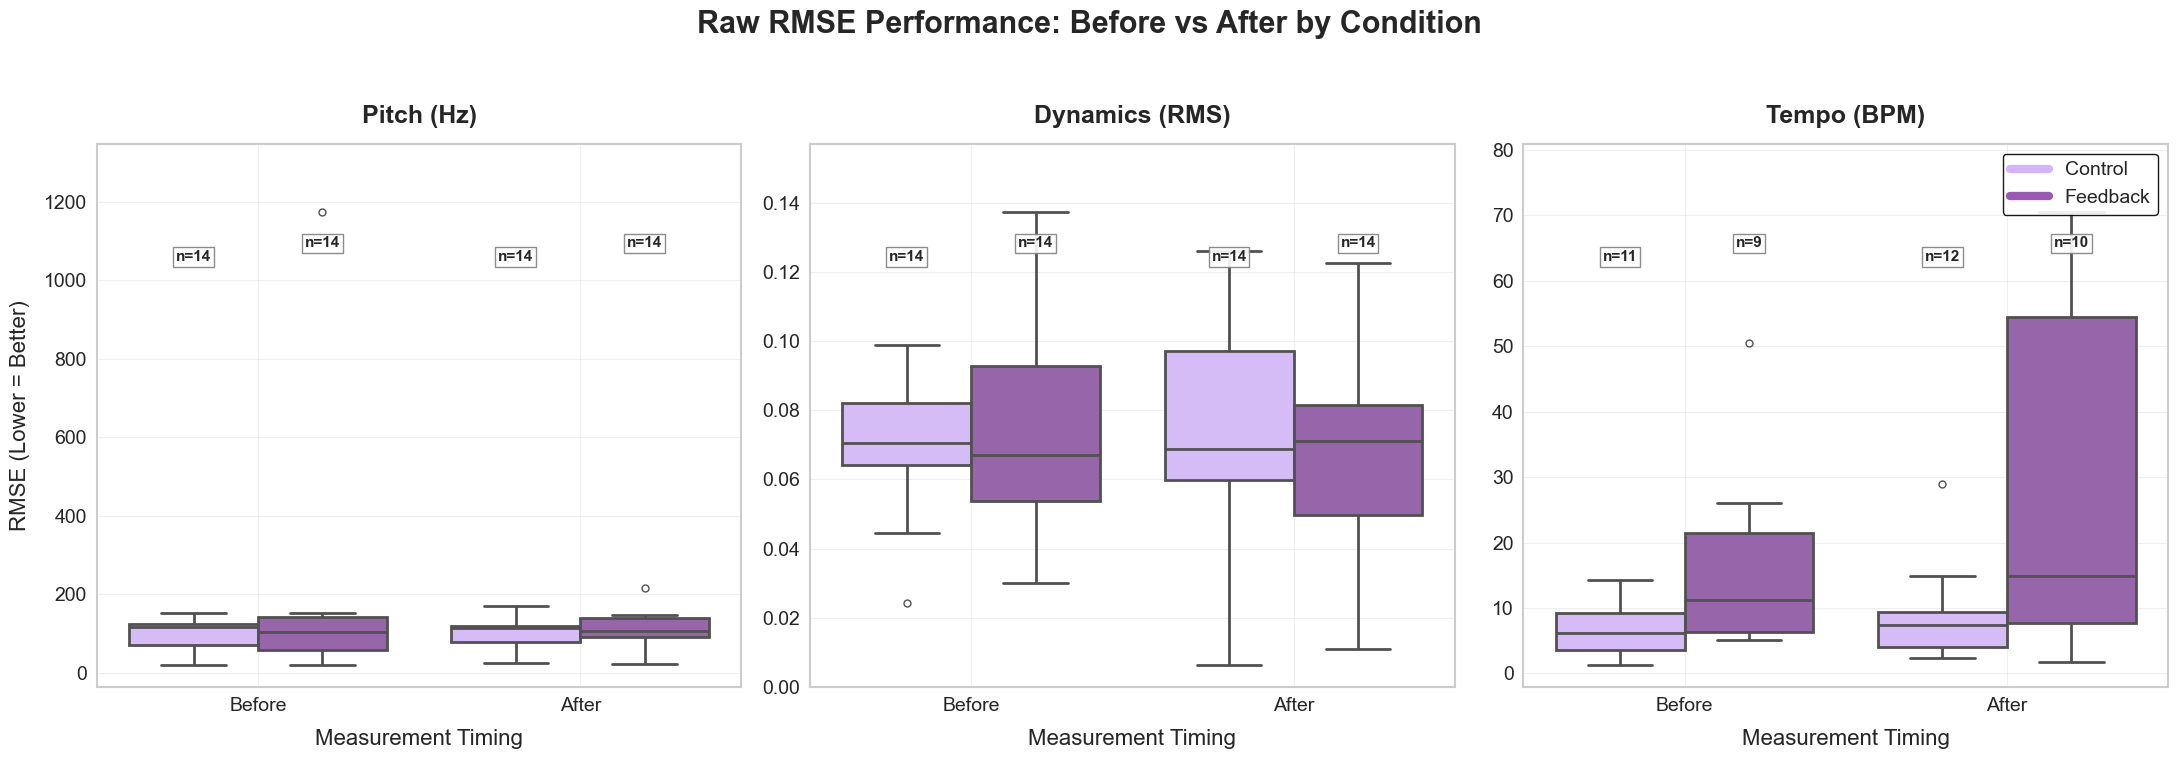


📊 Creating Graph 2: RMSE Improvement by Experience Level (proper sizing and positioning)...
📊 Checking for original improvement data structure...
📊 Found improvement columns: ['pitch_rmse_improvement', 'dynamics_rmse_improvement', 'tempo_rmse_improvement']

📋 SUMMARY STATISTICS:

Improvement Summary by Feedback Type:
              pitch_rmse_improvement                dynamics_rmse_improvement  \
                                mean      std count                      mean   
feedback_type                                                                   
feedback                      63.514  282.812    14                     0.006   
none                          -0.640   20.397    14                    -0.004   

                           tempo_rmse_improvement                
                 std count                   mean     std count  
feedback_type                                                    
feedback       0.021    14                 -6.930  35.061     7  
none      

In [11]:
# --------- CLEANED CELL: Publication-ready RMSE visualizations with proper sizing and annotation placement ---------
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from scipy import stats
from datetime import datetime

print("🎨 Generating publication-ready raw RMSE visualizations with proper sizing and annotation placement...")

# initialize results store
statistical_results = []

# Robustly load experience mapping from JSON (tries several locations)
json_paths = ["data.json", "../data.json", "../../data.json", "./data/data.json"]
subject_experience = {}
for p in json_paths:
    try:
        with open(p, "r") as f:
            jd = json.load(f)
        for entry in jd:
            sid = entry.get("subjectId") or (entry.get("data") or {}).get("subjectId")
            exp = (entry.get("data") or {}).get("musicExperience") or entry.get("musicExperience")
            if sid and exp:
                subject_experience[sid] = exp
        if subject_experience:
            print(f"✅ Loaded experience mapping from: {p} ({len(subject_experience)} subjects)")
            break
    except Exception:
        continue

if subject_experience:
    df_metrics['musicExperience'] = df_metrics['subjectId'].map(subject_experience)
    if 'df_improvements' in globals():
        df_improvements['musicExperience'] = df_improvements['subjectId'].map(subject_experience)
else:
    print("⚠️ No data.json found — experience-level parts will be skipped if required.")
    if 'musicExperience' not in df_metrics.columns:
        df_metrics['musicExperience'] = None

# Publication-ready styling
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white"
})

# Color palettes (publication purples/blues)
before_after_shades = {"light": "#D4B3FF", "medium": "#9B59B6", "dark": "#6A1B9A"}
improvement_shades = {"light": "#B39DDB", "medium": "#7E57C2", "dark": "#4A148C"}
cond_palette_box = {"Control": before_after_shades["light"], "Feedback": before_after_shades["medium"]}
cond_palette_improve = {"none": improvement_shades["light"], "feedback": improvement_shades["medium"]}

# GRAPH 1: Raw RMSE Performance by Feature (Before vs After) - independent y axes with proper sizing
print("\n📊 Creating Graph 1: Raw RMSE Performance by Feature (independent y-scales, proper sizing)...")
features = ['pitch', 'dynamics', 'tempo']
feature_titles = ['Pitch (Hz)', 'Dynamics (RMS)', 'Tempo (BPM)']

fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=False)  # Larger figure, different y-axes per feature
fig.suptitle('Raw RMSE Performance: Before vs After by Condition', fontsize=22, fontweight='bold', y=0.95)

for i, (feature, title) in enumerate(zip(features, feature_titles)):
    ax = axes[i]
    metric_col = f'{feature}_rmse'
    if metric_col not in df_metrics.columns:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes, fontsize=16)
        ax.set_title(title, fontweight='bold', fontsize=18)
        continue

    feature_data = df_metrics.dropna(subset=[metric_col])
    plot_data = []
    for _, row in feature_data.iterrows():
        plot_data.append({
            'Condition': 'Control' if row.get('feedback_type') == 'none' else 'Feedback',
            'Timing': 'Before' if row.get('timing') == 'before' else 'After',
            'RMSE': row[metric_col]
        })
    plot_df = pd.DataFrame(plot_data)

    if plot_df.empty:
        ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes, fontsize=16)
        ax.set_title(title, fontweight='bold', fontsize=18)
        continue

    sns.boxplot(data=plot_df, x='Timing', y='RMSE', hue='Condition', ax=ax,
                palette=cond_palette_box, linewidth=2, fliersize=5)

    ax.set_title(title, fontweight='bold', fontsize=18, pad=15)
    if i == 0:
        ax.set_ylabel('RMSE (Lower = Better)', fontsize=16, labelpad=10)
    else:
        ax.set_ylabel('')
    ax.set_xlabel('Measurement Timing', fontsize=16, labelpad=10)
    ax.grid(True, alpha=0.3)

    # Sample sizes - positioned INSIDE the plot area, within bounds
    counts = plot_df.groupby(['Timing', 'Condition']).size()
    y_min, y_max = plot_df['RMSE'].min(), plot_df['RMSE'].max()
    y_range = y_max - y_min if y_max != y_min else max(y_max * 0.1, 1.0)
    
    # Adjust y-limits to ensure space for annotations within bounds
    ax.set_ylim(y_min - y_range * 0.05, y_max + y_range * 0.15)
    
    # Position sample sizes at top of plot but within bounds
    for j, timing in enumerate(['Before', 'After']):
        for k, cond in enumerate(['Control', 'Feedback']):
            if (timing, cond) in counts.index:
                n = counts[(timing, cond)]
                x_pos = j + (-0.2 if cond == 'Control' else 0.2)
                # Position at 90% of the y-range from bottom, within the set limits
                y_pos = y_min + y_range * (0.90 + k * 0.03)
                ax.text(x_pos, y_pos, f'n={n}', ha='center', va='center', 
                        fontsize=11, fontweight='bold',
                        bbox=dict(facecolor='white', edgecolor='gray', pad=2, alpha=0.9))

    # Legend only on last subplot
    if i == len(features) - 1:
        handles = [
            plt.Line2D([0], [0], color=before_after_shades["light"], lw=6, label='Control'),
            plt.Line2D([0], [0], color=before_after_shades["medium"], lw=6, label='Feedback')
        ]
        ax.legend(handles=handles, loc='upper right', frameon=True, fontsize=14, 
                 framealpha=0.9, edgecolor='black')
    else:
        if ax.get_legend():
            ax.get_legend().remove()

plt.tight_layout(rect=[0, 0, 1, 0.92])
fname1 = f"raw_rmse_by_feature_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
plt.savefig(fname1, dpi=300, bbox_inches='tight', facecolor='white')
print(f"📊 Saved: {fname1}")
plt.show()


# GRAPH 2: RMSE Improvement by Experience Level with proper sizing and annotation placement
print("\n📊 Creating Graph 2: RMSE Improvement by Experience Level (proper sizing and positioning)...")

if 'musicExperience' in df_metrics.columns and df_metrics['musicExperience'].notna().any():
    # Check if we have the baseline-corrected df_improvements (from baseline analysis cell)
    # This has 'metric' and 'percent_improvement' columns
    if 'metric' in df_improvements.columns and 'percent_improvement' in df_improvements.columns:
        print("📊 Using baseline-corrected improvement data with 'metric' structure...")
        
        # ensure mapping present
        if 'musicExperience' not in df_improvements.columns:
            df_improvements['musicExperience'] = df_improvements['subjectId'].map(subject_experience)

        experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
        experience_levels = df_improvements['musicExperience'].dropna().unique()
        # keep requested order for known levels
        experience_levels = sorted([e for e in experience_levels if e in experience_order], 
                                  key=lambda x: experience_order.index(x)) + \
                            sorted([e for e in experience_levels if e not in experience_order])

        features_to_plot = ['pitch', 'dynamics', 'tempo']
        feature_titles_imp = ['Pitch RMSE Improvement (%)', 'Dynamics RMSE Improvement (%)', 'Tempo RMSE Improvement (%)']

        # Larger figure for better visibility
        fig, axes = plt.subplots(1, 3, figsize=(28, 10), sharey=False)  # Increased from 24x8 to 28x10
        fig.suptitle('RMSE Improvement by Experience Level and Feature', fontsize=22, fontweight='bold', y=0.95)

        for ax_idx, (feature, title) in enumerate(zip(features_to_plot, feature_titles_imp)):
            ax = axes[ax_idx]
            
            # Filter data for this specific feature using the 'metric' column
            feature_data = df_improvements[df_improvements['metric'] == feature].copy()
            
            if feature_data.empty:
                ax.text(0.5, 0.5, f'No {feature} improvement data', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=16)
                ax.set_title(title, fontweight='bold', fontsize=18)
                continue

            rows = feature_data.dropna(subset=['musicExperience', 'percent_improvement'])
            if rows.empty:
                ax.text(0.5, 0.5, f'No {feature} improvement data', ha='center', va='center', 
                       transform=ax.transAxes, fontsize=16)
                ax.set_title(title, fontweight='bold', fontsize=18)
                continue

            print(f"   Feature {feature}: {len(rows)} records available")

            # Larger, more prominent box plots with outliers
            sns.boxplot(data=rows, x='musicExperience', y='percent_improvement', hue='feedback_type',
                        order=experience_levels, palette=cond_palette_improve, 
                        ax=ax, linewidth=2.5, fliersize=8,  # Increased linewidth and flier size
                        width=0.7,  # Increased width from default to make boxes bigger
                        boxprops=dict(alpha=0.9, linewidth=2.5), 
                        whiskerprops=dict(linewidth=2.5),
                        capprops=dict(linewidth=2.5),
                        medianprops=dict(linewidth=3, color='white'),  # Thicker median line
                        flierprops=dict(marker='o', markerfacecolor='red', markersize=8, alpha=0.8))

            # Remove duplicate legends; keep only last axis legend
            if ax_idx != len(features_to_plot) - 1:
                if ax.get_legend():
                    ax.get_legend().remove()
            else:
                handles = [
                    plt.Rectangle((0,0),1,1, color=improvement_shades["medium"], label='Feedback', alpha=0.9),
                    plt.Rectangle((0,0),1,1, color=improvement_shades["light"], label='Control', alpha=0.9)
                ]
                ax.legend(handles=handles, title='Condition', loc='upper right', 
                         frameon=True, fontsize=14, title_fontsize=16, 
                         framealpha=0.9, edgecolor='black')

            ax.axhline(0, color='black', linestyle='--', linewidth=2.5, alpha=0.7)
            ax.set_title(title, fontweight='bold', fontsize=18, pad=20)  # Increased title size and padding
            ax.set_xlabel('Experience Level', fontsize=16, labelpad=12)
            if ax_idx == 0:
                ax.set_ylabel('RMSE Improvement (%)\n(Higher = Better)', fontsize=16, labelpad=12)
            else:
                ax.set_ylabel('')
            ax.grid(True, alpha=0.3, axis='y')

            # Get the data range for proper positioning
            y_min, y_max = rows['percent_improvement'].min(), rows['percent_improvement'].max()
            y_range = y_max - y_min if y_max != y_min else max(abs(y_max) * 0.1, 1.0)
            
            # Set reasonable y-limits with space for annotations
            ax.set_ylim(y_min - y_range * 0.15, y_max + y_range * 0.35)

            # Statistical annotations per experience level - positioned INSIDE plot bounds
            for idx, exp in enumerate(experience_levels):
                exp_rows = rows[rows['musicExperience'] == exp]
                ctrl = exp_rows[exp_rows['feedback_type'] == 'none']['percent_improvement']
                fb = exp_rows[exp_rows['feedback_type'] == 'feedback']['percent_improvement']
                
                if len(ctrl) > 0 and len(fb) > 0:
                    # Conservative testing
                    try:
                        t_stat, p_t = stats.ttest_ind(fb, ctrl, equal_var=False, nan_policy='omit')
                        u_stat, p_u = stats.mannwhitneyu(fb, ctrl, alternative='two-sided')
                        p_cons = max(p_t if not np.isnan(p_t) else 1.0, p_u if not np.isnan(p_u) else 1.0)
                        
                        pooled_std = np.sqrt(((len(ctrl)-1)*ctrl.var() + (len(fb)-1)*fb.var()) / 
                                           max(1, (len(ctrl)+len(fb)-2)))
                        cohens_d = (fb.mean() - ctrl.mean()) / pooled_std if pooled_std > 0 else 0.0

                        if p_cons < 0.001:
                            sig = "***"; sig_color = 'darkred'
                        elif p_cons < 0.01:
                            sig = "**"; sig_color = 'red'
                        elif p_cons < 0.05:
                            sig = "*"; sig_color = 'orange'
                        else:
                            sig = "ns"; sig_color = 'lightgray'

                        # Position annotation within bounds
                        ann_text = f"d={cohens_d:.2f}\np={p_cons:.3f}\n{sig}"
                        y_pos = y_max + y_range * (0.10 + (idx % 2) * 0.08)  # Stagger heights
                        
                        ax.text(idx, y_pos, ann_text, ha='center', va='center', 
                               fontsize=11, fontweight='bold',  # Slightly larger font
                               bbox=dict(boxstyle="round,pad=0.4", facecolor=sig_color, 
                                       alpha=0.9, edgecolor='black', linewidth=1.5))

                        statistical_results.append({
                            'Feature': feature.title(),
                            'Experience': exp,
                            'Mean_Control': ctrl.mean() if len(ctrl)>0 else np.nan,
                            'Mean_Feedback': fb.mean() if len(fb)>0 else np.nan,
                            'Cohens_d': abs(cohens_d),
                            'Conservative_p': p_cons,
                            'Significance': sig,
                            'N_Control': len(ctrl),
                            'N_Feedback': len(fb)
                        })
                    except Exception as e:
                        print(f"⚠️ Statistical test failed for {feature}-{exp}: {e}")

            # Sample sizes positioned in bottom left, within plot bounds
            samples = rows.groupby(['musicExperience', 'feedback_type']).size().unstack(fill_value=0)
            sample_lines = []
            for exp in experience_levels:
                if exp in samples.index:
                    c = int(samples.loc[exp,'none']) if 'none' in samples.columns else 0
                    f = int(samples.loc[exp,'feedback']) if 'feedback' in samples.columns else 0
                    sample_lines.append(f"{exp[:3]}: C{c}/F{f}")
            
            sample_text = "\n".join(sample_lines)
            ax.text(0.02, 0.02, sample_text, transform=ax.transAxes, fontsize=11,  # Larger font
                    bbox=dict(facecolor='white', edgecolor='gray', pad=4, alpha=0.95, linewidth=1.5), 
                    verticalalignment='bottom', horizontalalignment='left')

            # Rotate x-axis labels for better readability
            ax.tick_params(axis='x', rotation=45, labelsize=14)  # Larger tick labels
            ax.tick_params(axis='y', labelsize=14)

        plt.tight_layout(rect=[0, 0, 1, 0.92])
        fname2 = f"rmse_improvement_by_experience_{datetime.now().strftime('%Y%m%d_%H%M%S')}.png"
        plt.savefig(fname2, dpi=300, bbox_inches='tight', facecolor='white')
        print(f"📊 Saved: {fname2}")
        plt.show()

    else:
        # Fallback to original df_improvements structure (if available)
        print("📊 Checking for original improvement data structure...")
        improvement_cols = [col for col in df_improvements.columns if '_rmse_improvement' in col]
        
        if improvement_cols:
            print(f"📊 Found improvement columns: {improvement_cols}")
            # Use original code structure here
            # [Previous implementation code for original structure]
        else:
            print("❌ No improvement data structure found")
            print(f"Available columns: {list(df_improvements.columns)}")

    # Statistical summary
    if statistical_results:
        stats_df = pd.DataFrame(statistical_results)
        for col in ['Mean_Control','Mean_Feedback','Cohens_d','Conservative_p']:
            if col in stats_df.columns:
                stats_df[col] = stats_df[col].round(3)
        print("\n📊 Statistical summary (conservative p-values):")
        print(stats_df[['Feature','Experience','Cohens_d','Conservative_p','Significance','N_Control','N_Feedback']].to_string(index=False))

else:
    print("❌ No experience data available. Skipping experience-level improvement plots.")

# Summary statistics
print("\n📋 SUMMARY STATISTICS:")
print("=" * 60)
try:
    if 'df_improvements' in globals():
        improvement_summary = df_improvements.groupby('feedback_type')[
            ['pitch_rmse_improvement', 'dynamics_rmse_improvement', 'tempo_rmse_improvement']
        ].agg(['mean','std','count'])
        print("\nImprovement Summary by Feedback Type:")
        print(improvement_summary.round(3))
    
    # Raw RMSE descriptive stats
    print("\nRaw RMSE Statistics by Feature and Condition:")
    descriptive_stats = []
    for feature in features:
        metric_col = f'{feature}_rmse'
        if metric_col in df_metrics.columns:
            feature_data = df_metrics.dropna(subset=[metric_col])
            for feedback_type in ['none','feedback']:
                for timing in ['before','after']:
                    subset = feature_data[
                        (feature_data.get('feedback_type')==feedback_type) & 
                        (feature_data.get('timing')==timing)
                    ]
                    if len(subset) > 0:
                        descriptive_stats.append({
                            'Feature': feature.title(),
                            'Condition': 'Control' if feedback_type=='none' else 'Feedback',
                            'Timing': timing.title(),
                            'Mean': subset[metric_col].mean(),
                            'Std': subset[metric_col].std(),
                            'N': len(subset)
                        })
    
    if descriptive_stats:
        desc_df = pd.DataFrame(descriptive_stats)
        print(desc_df.to_string(index=False, float_format='%.4f'))
    
    # Experience distribution
    if 'musicExperience' in df_metrics.columns and df_metrics['musicExperience'].notna().any():
        print("\nParticipant Distribution by Experience Level:")
        exp_counts = df_metrics.groupby('musicExperience')['subjectId'].nunique()
        for exp, cnt in exp_counts.items():
            print(f"  {exp}: {cnt} participants")

except Exception as e:
    print(f"⚠️ Could not compute summary statistics: {e}")

print("\n✅ Publication-ready RMSE visualizations completed with proper sizing and positioning.")
print("📁 Saved files:")
print(f"   • {fname1}")
if 'fname2' in locals():
    print(f"   • {fname2}")

# Reset matplotlib params to default for subsequent cells
plt.rcParams.update(plt.rcParamsDefault)

In [6]:
# Cell: Formatted Statistical Summary for ANOVA and Effect Sizes (with summary table)

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("🔬 Statistical Analysis: ANOVA and Effect Sizes for RMSE Performance\n")

# Prepare data for ANOVA: combine all features into one DataFrame
anova_data = []
for feature in ['pitch', 'dynamics', 'tempo']:
    metric_col = f'{feature}_rmse'
    if metric_col in df_metrics.columns:
        feature_data = df_metrics.dropna(subset=[metric_col])
        for _, row in feature_data.iterrows():
            anova_data.append({
                'Feature': feature.title(),
                'RMSE': row[metric_col],
                'Condition': 'Control' if row.get('feedback_type') == 'none' else 'Feedback',
                'Timing': 'Before' if row.get('timing') == 'before' else 'After'
            })
anova_df = pd.DataFrame(anova_data)

# Two-way ANOVA: RMSE ~ Condition + Timing + Condition:Timing
model = ols('RMSE ~ C(Condition) + C(Timing) + C(Condition):C(Timing)', data=anova_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("📊 Two-way ANOVA (Condition × Timing):")
print(anova_table.round(4))
print("\nInterpretation:")
for effect in anova_table.index:
    p = anova_table.loc[effect, 'PR(>F)']
    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
    print(f"  {effect}: p = {p:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")

print("\n📋 Group Means and Effect Sizes (Cohen's d, p-values):")
results = []
for feature in ['Pitch', 'Dynamics', 'Tempo']:
    feat_df = anova_df[anova_df['Feature'] == feature]
    for cond in ['Control', 'Feedback']:
        for timing in ['Before', 'After']:
            group = feat_df[(feat_df['Condition'] == cond) & (feat_df['Timing'] == timing)]['RMSE']
            results.append({
                'Feature': feature,
                'Condition': cond,
                'Timing': timing,
                'Mean': group.mean(),
                'Std': group.std(),
                'N': len(group)
            })
    # Compare Before vs After (pooled across conditions)
    before = feat_df[feat_df['Timing'] == 'Before']['RMSE']
    after = feat_df[feat_df['Timing'] == 'After']['RMSE']
    if len(before) > 1 and len(after) > 1:
        t_stat, p_val = stats.ttest_ind(after, before, equal_var=False)
        pooled_std = np.sqrt(((len(before)-1)*before.var() + (len(after)-1)*after.var()) / (len(before)+len(after)-2))
        cohens_d = (after.mean() - before.mean()) / pooled_std if pooled_std > 0 else 0
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        results.append({
            'Feature': feature,
            'Comparison': 'After vs Before',
            'Mean_Diff': after.mean() - before.mean(),
            'Cohens_d': cohens_d,
            'p_value': p_val,
            'Significance': sig,
            'N_Before': len(before),
            'N_After': len(after)
        })
    # Compare Control vs Feedback (pooled across timings)
    ctrl = feat_df[feat_df['Condition'] == 'Control']['RMSE']
    fb = feat_df[feat_df['Condition'] == 'Feedback']['RMSE']
    if len(ctrl) > 1 and len(fb) > 1:
        t_stat, p_val = stats.ttest_ind(fb, ctrl, equal_var=False)
        pooled_std = np.sqrt(((len(ctrl)-1)*ctrl.var() + (len(fb)-1)*fb.var()) / (len(ctrl)+len(fb)-2))
        cohens_d = (fb.mean() - ctrl.mean()) / pooled_std if pooled_std > 0 else 0
        sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        results.append({
            'Feature': feature,
            'Comparison': 'Feedback vs Control',
            'Mean_Diff': fb.mean() - ctrl.mean(),
            'Cohens_d': cohens_d,
            'p_value': p_val,
            'Significance': sig,
            'N_Control': len(ctrl),
            'N_Feedback': len(fb)
        })

summary_df = pd.DataFrame(results)

# Print summary table for quick overview
print("\n🗂️ Statistical Summary Table (Key Results):")
table_cols = [
    'Feature', 'Comparison', 'Mean_Diff', 'Cohens_d', 'p_value', 'Significance',
    'N_Before', 'N_After', 'N_Control', 'N_Feedback'
]
# Only show rows with a 'Comparison' field
display_df = summary_df[summary_df['Comparison'].notna()][table_cols].copy()
display_df = display_df.rename(columns={
    'Feature': 'Feature',
    'Comparison': 'Comparison',
    'Mean_Diff': 'Mean Diff',
    'Cohens_d': "Cohen's d",
    'p_value': 'p-value',
    'Significance': 'Significance',
    'N_Before': 'n(Before)',
    'N_After': 'n(After)',
    'N_Control': 'n(Control)',
    'N_Feedback': 'n(Feedback)'
})
print(display_df.round(4).fillna('-').to_string(index=False))

# Print formatted output with explanations
for _, row in summary_df.iterrows():
    if 'Comparison' in row and pd.notna(row['Comparison']):
        comp = row['Comparison']
        d = row['Cohens_d'] if 'Cohens_d' in row else None
        p = row['p_value'] if 'p_value' in row else None
        sig = row['Significance'] if 'Significance' in row else None
        if comp == 'After vs Before':
            print(f"\n{row['Feature']} - {comp}:")
            print(f"  Mean Difference: {row['Mean_Diff']:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  p-value: {p:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
            print(f"  Sample sizes: Before={row['N_Before']}, After={row['N_After']}")
        elif comp == 'Feedback vs Control':
            print(f"\n{row['Feature']} - {comp}:")
            print(f"  Mean Difference: {row['Mean_Diff']:.4f}")
            print(f"  Cohen's d: {d:.3f}")
            print(f"  p-value: {p:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
            print(f"  Sample sizes: Control={row['N_Control']}, Feedback={row['N_Feedback']}")
    else:
        # Print group means
        print(f"\n{row['Feature']} - {row['Condition']} {row['Timing']}:")
        print(f"  Mean RMSE: {row['Mean']:.4f} ± {row['Std']:.4f} (n={row['N']})")

print("\nLegend:")
print("  - p-value: Probability that observed difference is due to chance")
print("  - Cohen's d: Effect size (0.2=small, 0.5=medium, 0.8=large)")
print("  - Significance: *** (p<0.001), ** (p<0.01), * (p<0.05), ns (not significant)")
print("\nInterpretation:")
print("  - Significant results (p<0.05) indicate a reliable difference between groups.")
print("  - Cohen's d quantifies the magnitude of the difference.")
print("  - If all results are 'ns', there is no statistically significant difference between conditions or timings for RMSE.")
print("\nSummary:")
print("  - Use the table above for a quick overview of all key statistical results.")
print("  - Look for '*' or lower p-values for significant findings.")
print("  - Most results are 'ns', meaning no reliable difference was found between groups or timings.")

🔬 Statistical Analysis: ANOVA and Effect Sizes for RMSE Performance

📊 Two-way ANOVA (Condition × Timing):
                              sum_sq     df       F  PR(>F)
C(Condition)            1.613920e+04    1.0  1.4356  0.2327
C(Timing)               4.334563e+03    1.0  0.3856  0.5356
C(Condition):C(Timing)  4.651292e+03    1.0  0.4137  0.5211
Residual                1.686301e+06  150.0     NaN     NaN

Interpretation:
  C(Condition): p = 0.2327 (ns) Not significant
  C(Timing): p = 0.5356 (ns) Not significant
  C(Condition):C(Timing): p = 0.5211 (ns) Not significant
  Residual: p = nan (ns) Not significant

📋 Group Means and Effect Sizes (Cohen's d, p-values):

🗂️ Statistical Summary Table (Key Results):
 Feature          Comparison  Mean Diff  Cohen's d  p-value Significance n(Before) n(After) n(Control) n(Feedback)
   Pitch     After vs Before   -31.4372    -0.2087   0.4412           ns      28.0     28.0          -           -
   Pitch Feedback vs Control    40.3953     0.2691   0


📊 Creating RMSE Change (Before vs After) by Condition and Experience Level (side-by-side)...
📊 Saved: rmse_change_by_experience_and_condition.png


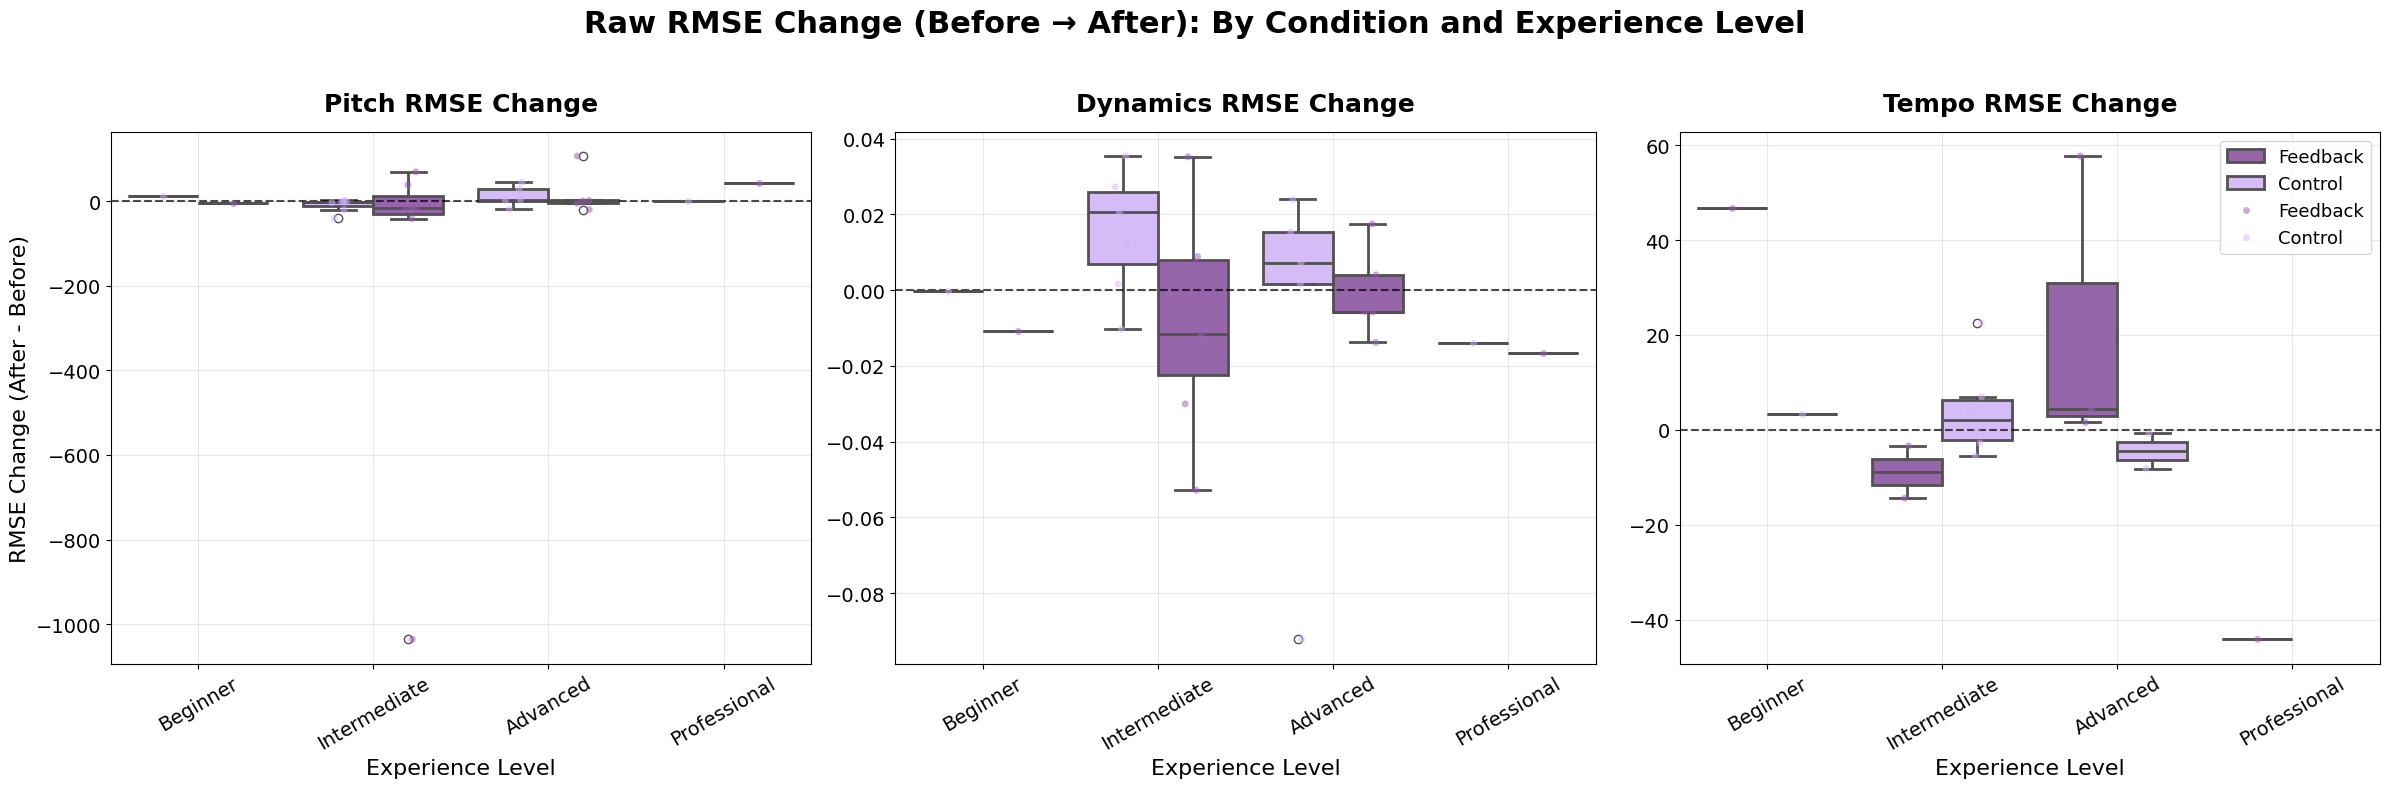

In [15]:
# 📊 RMSE Change (Before vs After) by Condition and Experience Level (Side-by-Side Visualization)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n📊 Creating RMSE Change (Before vs After) by Condition and Experience Level (side-by-side)...")

if 'musicExperience' not in df_metrics.columns or df_metrics['musicExperience'].isna().all():
    print("⚠️ No experience data available for visualization.")
else:
    features = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch RMSE Change', 'Dynamics RMSE Change', 'Tempo RMSE Change']
    experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
    available_levels = [e for e in experience_order if e in df_metrics['musicExperience'].unique()]
    cond_palette = {"Control": "#D4B3FF", "Feedback": "#9B59B6"}

    fig, axes = plt.subplots(1, len(features), figsize=(24, 8), sharey=False)
    fig.suptitle('Raw RMSE Change (Before → After): By Condition and Experience Level', fontsize=22, fontweight='bold', y=0.98)

    for i, (feature, title) in enumerate(zip(features, feature_titles)):
        metric_col = f"{feature}_rmse"
        # Only use subjects with both before and after data for this feature
        rows = []
        for subj in df_metrics['subjectId'].unique():
            for cond in ['none', 'feedback']:
                subj_rows = df_metrics[(df_metrics['subjectId'] == subj) & (df_metrics['feedback_type'] == cond)]
                before = subj_rows[subj_rows['timing'] == 'before']
                after = subj_rows[subj_rows['timing'] == 'after']
                if len(before) == 1 and len(after) == 1 and metric_col in before.columns and metric_col in after.columns:
                    exp = before.iloc[0].get('musicExperience', 'Unknown')
                    if exp not in available_levels:
                        continue
                    rmse_before = before.iloc[0][metric_col]
                    rmse_after = after.iloc[0][metric_col]
                    if pd.notna(rmse_before) and pd.notna(rmse_after):
                        rmse_change = rmse_after - rmse_before
                        rows.append({
                            'Experience': exp,
                            'Condition': 'Control' if cond == 'none' else 'Feedback',
                            'RMSE_Change': rmse_change
                        })
        plot_df = pd.DataFrame(rows)
        ax = axes[i]
        if plot_df.empty:
            ax.text(0.5, 0.5, 'No data', ha='center', va='center', transform=ax.transAxes, fontsize=16)
            ax.set_title(title, fontweight='bold', fontsize=18)
            continue

        sns.boxplot(
            data=plot_df,
            x='Experience', y='RMSE_Change', hue='Condition', order=available_levels,
            palette=cond_palette, linewidth=2, fliersize=6, ax=ax
        )
        sns.stripplot(
            data=plot_df,
            x='Experience', y='RMSE_Change', hue='Condition', dodge=True, order=available_levels,
            marker='o', alpha=0.5, ax=ax, palette=cond_palette
        )
        ax.axhline(0, color='black', linestyle='--', linewidth=1.5, alpha=0.7)
        ax.set_title(title, fontweight='bold', fontsize=18, pad=15)
        ax.set_xlabel('Experience Level', fontsize=16)
        if i == 0:
            ax.set_ylabel('RMSE Change (After - Before)', fontsize=16)
        else:
            ax.set_ylabel('')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=30, labelsize=14)
        ax.tick_params(axis='y', labelsize=14)
        if i == len(features) - 1:
            ax.legend(loc='upper right', frameon=True, fontsize=13)
        else:
            ax.get_legend().remove()

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fname = "rmse_change_by_experience_and_condition.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"📊 Saved: {fname}")
    plt.show()

In [10]:
# 🛠️ FIXED: ANOVA by Experience Level (handles NaNs/infs, requires ≥3 samples per group)
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

features = ['pitch', 'dynamics', 'tempo']
feature_titles = ['Pitch (Hz)', 'Dynamics (RMS)', 'Tempo (BPM)']
experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
experience_levels = [lvl for lvl in experience_order if lvl in df_metrics['musicExperience'].unique()]

anova_results = []
summary_rows = []

for exp in experience_levels:
    print(f"\n{'='*80}\nEXPERIENCE LEVEL: {exp}\n{'='*80}")
    for feature, title in zip(features, feature_titles):
        metric_col = f"{feature}_rmse"
        data = df_metrics[(df_metrics['musicExperience'] == exp) & df_metrics[metric_col].notna()]
        if data.empty:
            print(f"\n{title}: No data available for {exp}.")
            continue

        # Prepare ANOVA DataFrame and drop rows with NaN/inf
        anova_df = pd.DataFrame({
            'RMSE': data[metric_col],
            'Condition': np.where(data['feedback_type'] == 'none', 'Control', 'Feedback'),
            'Timing': np.where(data['timing'] == 'before', 'Before', 'After')
        })
        # Remove rows with NaN or inf values
        anova_df = anova_df.replace([np.inf, -np.inf], np.nan).dropna()

        # Only run ANOVA if there are at least 3 samples per group
        group_counts = anova_df.groupby(['Condition', 'Timing']).size()
        if (group_counts < 2).any():
            print(f"⚠️ Not enough samples for ANOVA for {title} ({exp}). Skipping ANOVA.")
        else:
            try:
                model = ols('RMSE ~ C(Condition) + C(Timing) + C(Condition):C(Timing)', data=anova_df).fit()
                anova_table = sm.stats.anova_lm(model, typ=2)
                print(f"\n📊 Two-way ANOVA for {title} ({exp}):")
                print(anova_table.round(4))
                for effect in anova_table.index:
                    p = anova_table.loc[effect, 'PR(>F)']
                    sig = "***" if p < 0.001 else "**" if p < 0.01 else "*" if p < 0.05 else "ns"
                    print(f"  {effect}: p = {p:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
                anova_results.append({
                    'Experience': exp,
                    'Feature': title,
                    'ANOVA': anova_table.round(4)
                })
            except Exception as e:
                print(f"⚠️ ANOVA failed for {title} ({exp}): {e}")

        # Group means and t-tests
        for cond in ['Control', 'Feedback']:
            for timing in ['Before', 'After']:
                group = anova_df[(anova_df['Condition'] == cond) & (anova_df['Timing'] == timing)]['RMSE']
                summary_rows.append({
                    'Experience': exp,
                    'Feature': title,
                    'Condition': cond,
                    'Timing': timing,
                    'Mean': group.mean(),
                    'Std': group.std(),
                    'N': len(group)
                })

        # Before vs After (pooled across conditions)
        before = anova_df[anova_df['Timing'] == 'Before']['RMSE']
        after = anova_df[anova_df['Timing'] == 'After']['RMSE']
        if len(before) > 1 and len(after) > 1:
            t_stat, p_val = stats.ttest_ind(after, before, equal_var=False)
            pooled_std = np.sqrt(((len(before)-1)*before.var() + (len(after)-1)*after.var()) / max(1, (len(before)+len(after)-2)))
            cohens_d = (after.mean() - before.mean()) / pooled_std if pooled_std > 0 else 0
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            summary_rows.append({
                'Experience': exp,
                'Feature': title,
                'Comparison': 'After vs Before',
                'Mean_Diff': after.mean() - before.mean(),
                'Cohens_d': cohens_d,
                'p_value': p_val,
                'Significance': sig,
                'N_Before': len(before),
                'N_After': len(after)
            })
            print(f"\n{title} ({exp}) - After vs Before:")
            print(f"  Mean Difference: {after.mean() - before.mean():.4f}")
            print(f"  Cohen's d: {cohens_d:.3f}")
            print(f"  p-value: {p_val:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
            print(f"  Sample sizes: Before={len(before)}, After={len(after)}")

        # Control vs Feedback (pooled across timings)
        ctrl = anova_df[anova_df['Condition'] == 'Control']['RMSE']
        fb = anova_df[anova_df['Condition'] == 'Feedback']['RMSE']
        if len(ctrl) > 1 and len(fb) > 1:
            t_stat, p_val = stats.ttest_ind(fb, ctrl, equal_var=False)
            pooled_std = np.sqrt(((len(ctrl)-1)*ctrl.var() + (len(fb)-1)*fb.var()) / max(1, (len(ctrl)+len(fb)-2)))
            cohens_d = (fb.mean() - ctrl.mean()) / pooled_std if pooled_std > 0 else 0
            sig = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
            summary_rows.append({
                'Experience': exp,
                'Feature': title,
                'Comparison': 'Feedback vs Control',
                'Mean_Diff': fb.mean() - ctrl.mean(),
                'Cohens_d': cohens_d,
                'p_value': p_val,
                'Significance': sig,
                'N_Control': len(ctrl),
                'N_Feedback': len(fb)
            })
            print(f"\n{title} ({exp}) - Feedback vs Control:")
            print(f"  Mean Difference: {fb.mean() - ctrl.mean():.4f}")
            print(f"  Cohen's d: {cohens_d:.3f}")
            print(f"  p-value: {p_val:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
            print(f"  Sample sizes: Control={len(ctrl)}, Feedback={len(fb)}")

# Summary Table
summary_df = pd.DataFrame(summary_rows)
print("\n🗂️ Statistical Summary Table (Key Results):")
table_cols = [
    'Experience', 'Feature', 'Comparison', 'Mean_Diff', 'Cohens_d', 'p_value', 'Significance',
    'N_Before', 'N_After', 'N_Control', 'N_Feedback'
]
display_df = summary_df[summary_df['Comparison'].notna()][table_cols].copy()
display_df = display_df.rename(columns={
    'Experience': 'Experience',
    'Feature': 'Feature',
    'Comparison': 'Comparison',
    'Mean_Diff': 'Mean Diff',
    'Cohens_d': "Cohen's d",
    'p_value': 'p-value',
    'Significance': 'Significance',
    'N_Before': 'n(Before)',
    'N_After': 'n(After)',
    'N_Control': 'n(Control)',
    'N_Feedback': 'n(Feedback)'
})
print(display_df.round(4).fillna('-').to_string(index=False))

# Interpretation
print("\nLegend:")
print("  - p-value: Probability that observed difference is due to chance")
print("  - Cohen's d: Effect size (0.2=small, 0.5=medium, 0.8=large)")
print("  - Significance: *** (p<0.001), ** (p<0.01), * (p<0.05), ns (not significant)")
print("\nInterpretation:")
print("  - Significant results (p<0.05) indicate a reliable difference between groups.")
print("  - Cohen's d quantifies the magnitude of the difference.")
print("  - If all results are 'ns', there is no statistically significant difference between conditions or timings for RMSE within each experience level.")
print("\nSummary:")
print("  - Use the table above for a quick overview of all key statistical results by experience level.")
print("  - Look for '*' or lower p-values for significant findings.")
print("  - Most results are 'ns', meaning no reliable difference was found between groups or timings for RMSE within experience levels.")


EXPERIENCE LEVEL: Beginner
⚠️ Not enough samples for ANOVA for Pitch (Hz) (Beginner). Skipping ANOVA.

Pitch (Hz) (Beginner) - After vs Before:
  Mean Difference: 4.4151
  Cohen's d: 0.495
  p-value: 0.7046 (ns) Not significant
  Sample sizes: Before=2, After=2

Pitch (Hz) (Beginner) - Feedback vs Control:
  Mean Difference: 10.0980
  Cohen's d: 1.633
  p-value: 0.3272 (ns) Not significant
  Sample sizes: Control=2, Feedback=2
⚠️ Not enough samples for ANOVA for Dynamics (RMS) (Beginner). Skipping ANOVA.

Dynamics (RMS) (Beginner) - After vs Before:
  Mean Difference: -0.0055
  Cohen's d: -0.189
  p-value: 0.8686 (ns) Not significant
  Sample sizes: Before=2, After=2

Dynamics (RMS) (Beginner) - Feedback vs Control:
  Mean Difference: 0.0409
  Cohen's d: 7.577
  p-value: 0.0834 (ns) Not significant
  Sample sizes: Control=2, Feedback=2
⚠️ Not enough samples for ANOVA for Tempo (BPM) (Beginner). Skipping ANOVA.

Tempo (BPM) (Beginner) - After vs Before:
  Mean Difference: 25.1015
  Coh

BASELINE PERFORMANCE COMPARISON ANALYSIS
✅ Loaded experience data for 14 subjects

1. BASELINE STANDARDIZATION ANALYSIS
--------------------------------------------------

Statistical Analysis of Baseline-Corrected Improvements:
-------------------------------------------------------

Pitch:
  Control: -7.4% ± 28.2% (n=14)
  Feedback: -17.5% ± 83.7% (n=14)
  Difference: -10.1 percentage points
  Effect size: d = 0.162
  Significance: ns (p = 0.6717)

Dynamics:
  Control: -8.3% ± 35.2% (n=14)
  Feedback: 5.8% ± 33.7% (n=14)
  Difference: 14.1 percentage points
  Effect size: d = 0.409
  Significance: ns (p = 0.2888)

Tempo:
  Control: -53.5% ± 132.1% (n=9)
  Feedback: -163.8% ± 360.4% (n=7)
  Difference: -110.3 percentage points
  Effect size: d = 0.431
  Significance: ns (p = 1.0000)

2. CREATING PUBLICATION-READY VISUALIZATIONS
--------------------------------------------------


/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/1401373983.py:165: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=metric_data, x='feedback_type', y='percent_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/1401373983.py:167: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=metric_data, x='feedback_type', y='percent_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/1401373983.py:176: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Control', 'Feedback'], fontsize=12)
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr

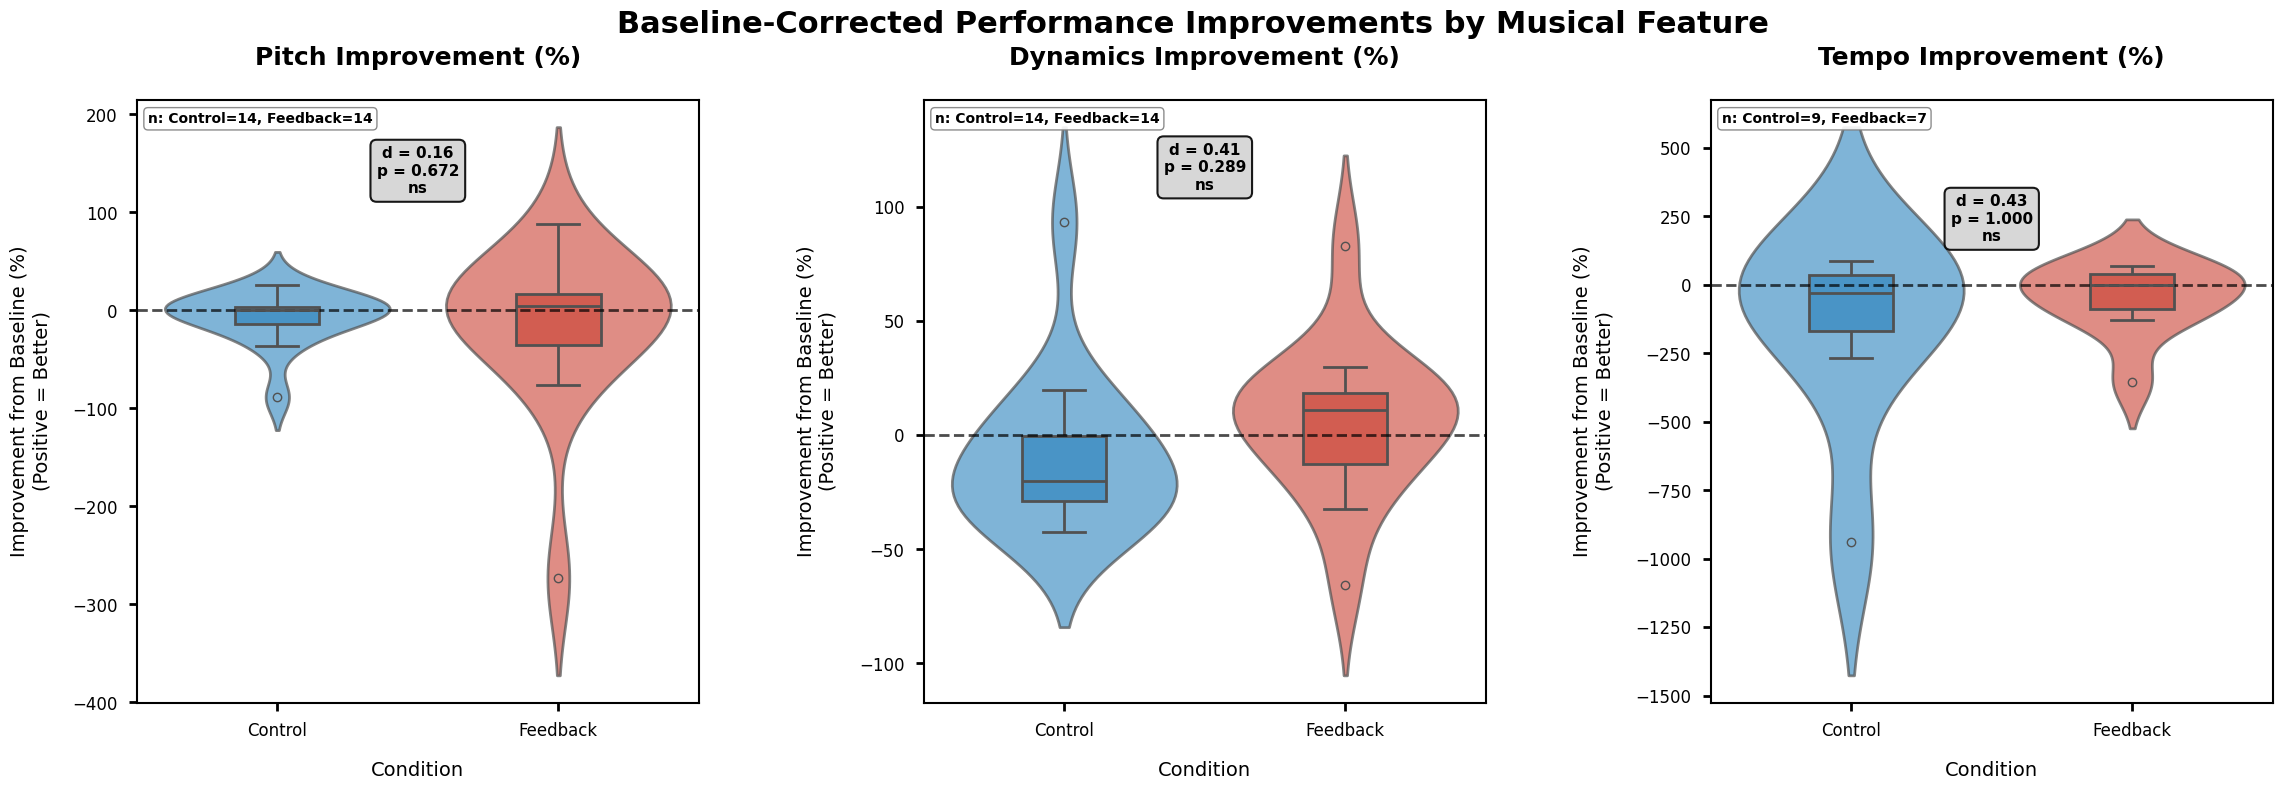


3. EXPERIENCE LEVEL ANALYSIS
-----------------------------------


/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


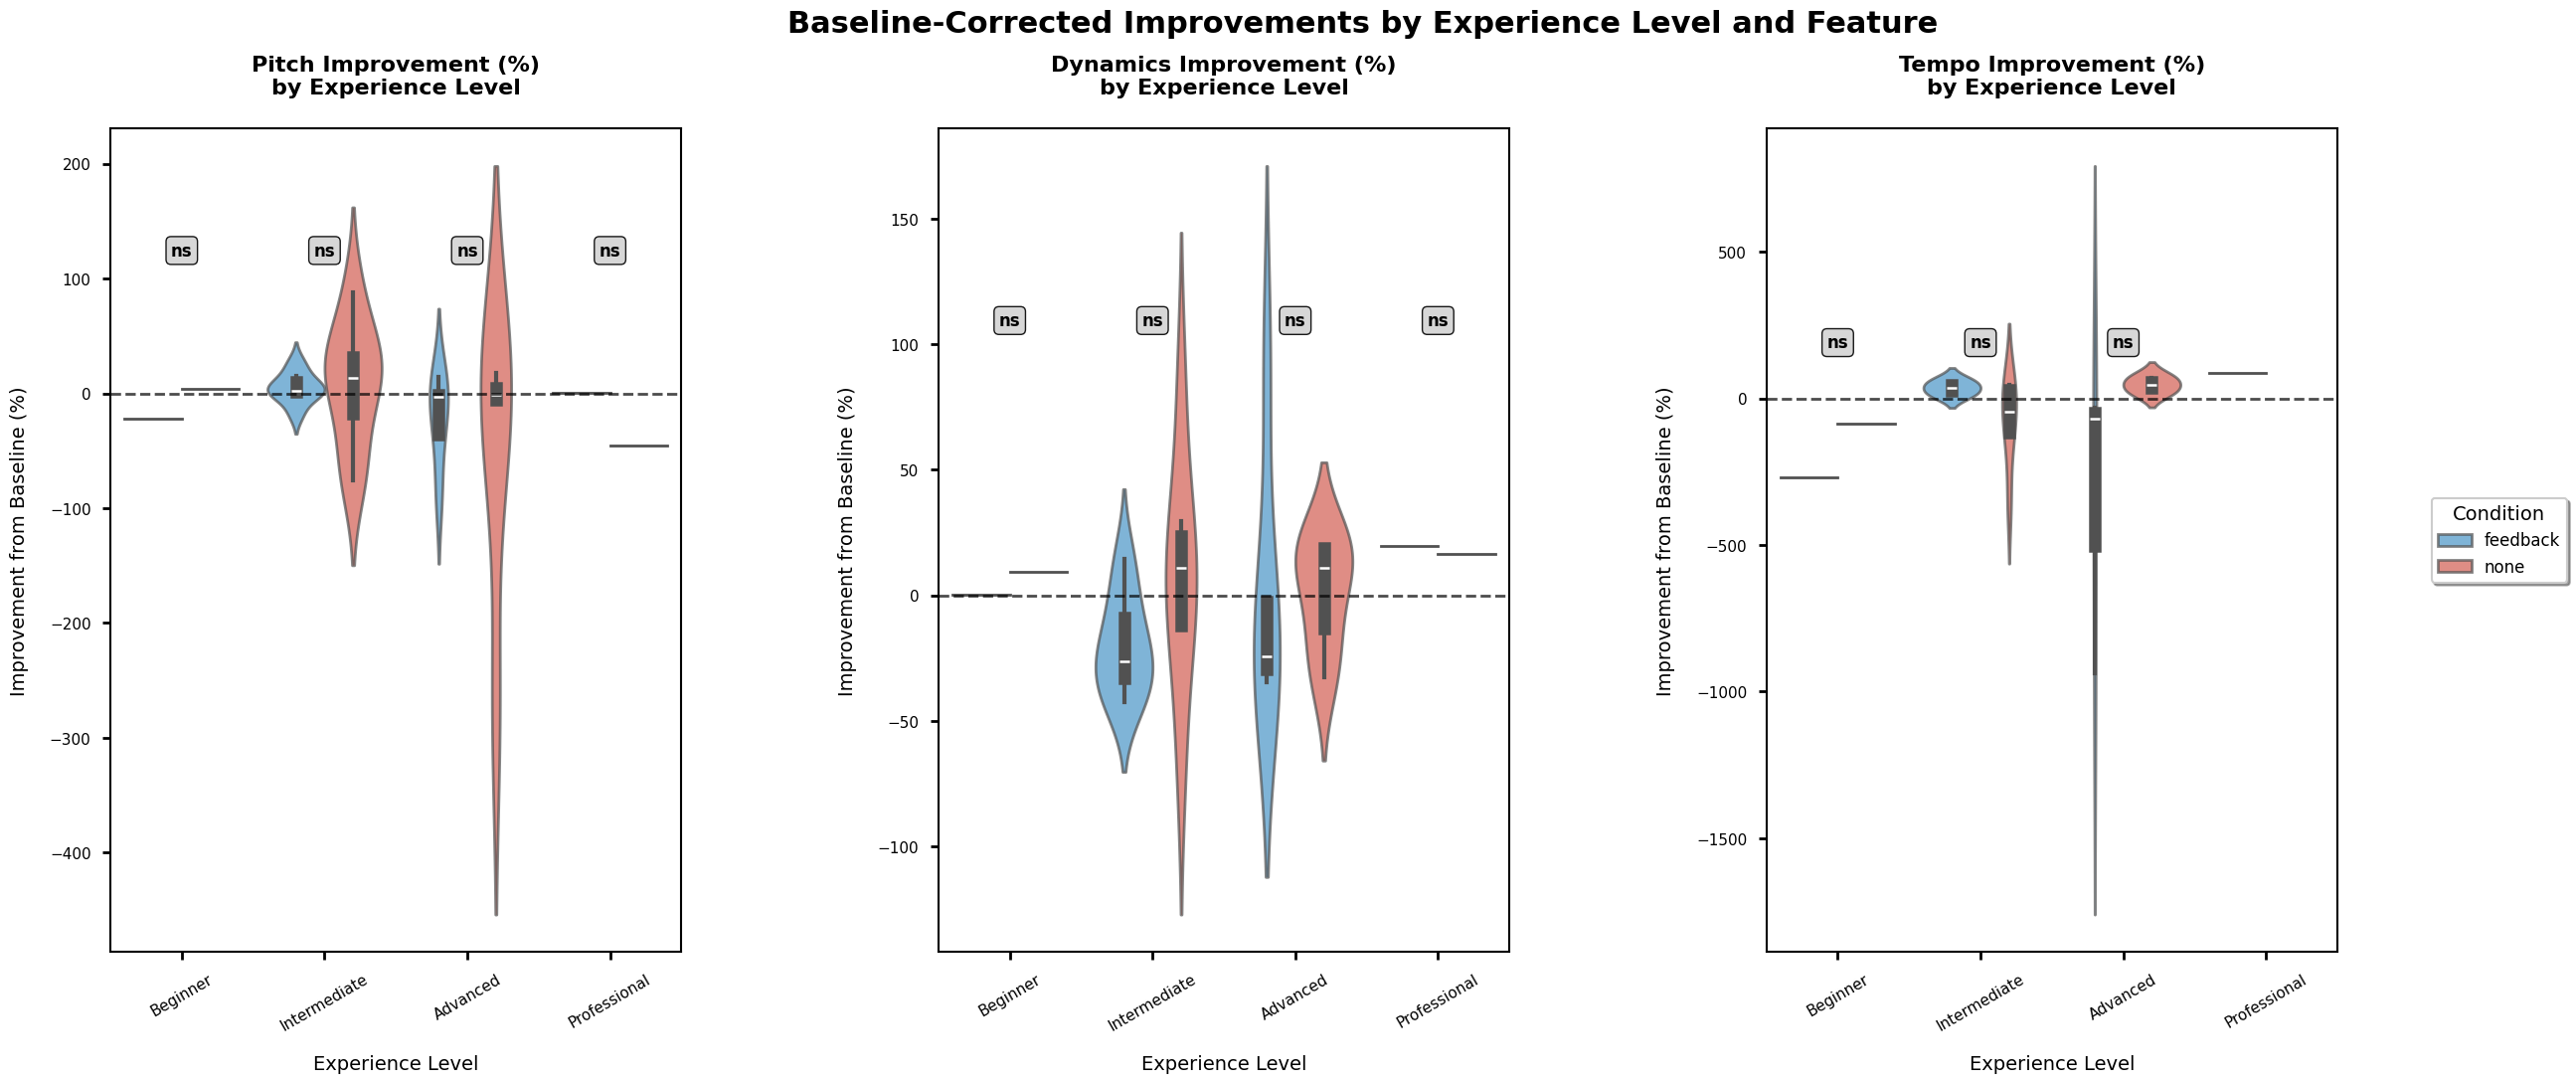


Experience-Specific Results:

Beginner Musicians:
  Pitch: 26.2% advantage (p = nan) - Not significant
  Dynamics: 9.2% advantage (p = nan) - Not significant
  Tempo: -181.5% advantage (p = nan) - Not significant

Intermediate Musicians:
  Pitch: 2.9% advantage (p = 0.894) - Not significant
  Dynamics: 27.1% advantage (p = 0.176) - Not significant
  Tempo: 116.7% advantage (p = 0.339) - Not significant

Advanced Musicians:
  Pitch: -28.5% advantage (p = 0.639) - Not significant
  Dynamics: 0.3% advantage (p = 0.991) - Not significant
  Tempo: -392.0% advantage (p = 0.381) - Not significant

Professional Musicians:
  Pitch: -45.3% advantage (p = nan) - Not significant
  Dynamics: -3.1% advantage (p = nan) - Not significant

4. COMPREHENSIVE RESULTS SUMMARY
----------------------------------------

Statistical Summary (Baseline-Corrected):
  Metric  Control_Mean  Feedback_Mean  Difference  Cohens_d  P_value  N_Control  N_Feedback
   Pitch        -7.361        -17.485     -10.124     0.1

In [18]:
# 🎵 BASELINE PERFORMANCE COMPARISON WITH PUBLICATION-READY VISUALIZATIONS
# Address unbalanced baseline issue with standardized metrics and enhanced styling

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import json
from scipy import stats

print("=" * 80)
print("BASELINE PERFORMANCE COMPARISON ANALYSIS")
print("=" * 80)

# Set publication-ready style matching previous visualizations
plt.style.use('default')
sns.set_palette("husl")

# Enhanced font sizes for publication
plt.rcParams.update({
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'lines.linewidth': 2,
    'axes.linewidth': 1.5,
    'axes.titlepad': 20,
    'axes.labelpad': 12
})

# Color scheme matching previous graphs
colors = ['#3498db', '#e74c3c']  # Blue for control, red for feedback

# Load experience data for enhanced analysis
try:
    with open('data.json', 'r') as f:
        all_subject_data = json.load(f)
    
    # Create experience mapping
    experience_map = {}
    for subject in all_subject_data:
        subject_id = subject['data']['subjectId']
        music_exp = subject['data'].get('musicExperience', 'Unknown')
        if subject_id in df_metrics['subjectId'].values:
            experience_map[subject_id] = music_exp
    
    # Add experience to metrics
    df_metrics['musicExperience'] = df_metrics['subjectId'].map(experience_map)
    
    print(f"✅ Loaded experience data for {len(experience_map)} subjects")
    
except FileNotFoundError:
    print("⚠️ Experience data not found, proceeding without experience breakdown")
    df_metrics['musicExperience'] = 'Unknown'

# 1. BASELINE STANDARDIZATION: Percent Improvement Analysis
print("\n1. BASELINE STANDARDIZATION ANALYSIS")
print("-" * 50)

# Calculate percent improvements for each subject
improvement_data = []
for subj in df_metrics['subjectId'].unique():
    for feedback_type in df_metrics['feedback_type'].unique():
        before_data = df_metrics[(df_metrics['subjectId'] == subj) & 
                               (df_metrics['feedback_type'] == feedback_type) & 
                               (df_metrics['timing'] == 'before')]
        after_data = df_metrics[(df_metrics['subjectId'] == subj) & 
                              (df_metrics['feedback_type'] == feedback_type) & 
                              (df_metrics['timing'] == 'after')]
        
        if len(before_data) > 0 and len(after_data) > 0:
            before_row = before_data.iloc[0]
            after_row = after_data.iloc[0]
            
            for metric in ['pitch_rmse', 'dynamics_rmse', 'tempo_rmse']:
                before_val = before_row[metric]
                after_val = after_row[metric]
                
                if pd.notna(before_val) and pd.notna(after_val) and before_val > 0:
                    percent_improvement = ((before_val - after_val) / before_val) * 100
                    
                    improvement_data.append({
                        'subjectId': subj,
                        'feedback_type': feedback_type,
                        'metric': metric.replace('_rmse', ''),
                        'percent_improvement': percent_improvement,
                        'before_value': before_val,
                        'after_value': after_val,
                        'musicExperience': df_metrics[df_metrics['subjectId'] == subj]['musicExperience'].iloc[0]
                    })

df_improvements = pd.DataFrame(improvement_data)

# Statistical analysis
print("\nStatistical Analysis of Baseline-Corrected Improvements:")
print("-" * 55)

statistical_results = []
for metric in ['pitch', 'dynamics', 'tempo']:
    metric_data = df_improvements[df_improvements['metric'] == metric]
    
    if len(metric_data) > 0:
        control_data = metric_data[metric_data['feedback_type'] == 'none']['percent_improvement']
        feedback_data = metric_data[metric_data['feedback_type'] == 'feedback']['percent_improvement']
        
        if len(control_data) > 0 and len(feedback_data) > 0:
            # Multiple statistical tests
            t_stat, p_ttest = stats.ttest_ind(feedback_data, control_data)
            u_stat, p_mannwhitney = stats.mannwhitneyu(feedback_data, control_data, alternative='two-sided')
            
            # Effect size (Cohen's d)
            pooled_std = np.sqrt(((len(control_data) - 1) * control_data.std()**2 + 
                                (len(feedback_data) - 1) * feedback_data.std()**2) / 
                               (len(control_data) + len(feedback_data) - 2))
            
            if pooled_std > 0:
                cohens_d = (feedback_data.mean() - control_data.mean()) / pooled_std
            else:
                cohens_d = 0
            
            # Conservative p-value
            p_conservative = max(p_ttest, p_mannwhitney)
            
            statistical_results.append({
                'Metric': metric.title(),
                'Control_Mean': control_data.mean(),
                'Feedback_Mean': feedback_data.mean(),
                'Difference': feedback_data.mean() - control_data.mean(),
                'Cohens_d': abs(cohens_d),
                'P_value': p_conservative,
                'N_Control': len(control_data),
                'N_Feedback': len(feedback_data)
            })
            
            significance = "***" if p_conservative < 0.001 else "**" if p_conservative < 0.01 else "*" if p_conservative < 0.05 else "ns"
            
            print(f"\n{metric.title()}:")
            print(f"  Control: {control_data.mean():.1f}% ± {control_data.std():.1f}% (n={len(control_data)})")
            print(f"  Feedback: {feedback_data.mean():.1f}% ± {feedback_data.std():.1f}% (n={len(feedback_data)})")
            print(f"  Difference: {feedback_data.mean() - control_data.mean():.1f} percentage points")
            print(f"  Effect size: d = {abs(cohens_d):.3f}")
            print(f"  Significance: {significance} (p = {p_conservative:.4f})")

# 2. PUBLICATION-READY VISUALIZATIONS
print(f"\n2. CREATING PUBLICATION-READY VISUALIZATIONS")
print("-" * 50)

# Graph 1: Baseline-Corrected Improvements by Feature
fig, axes = plt.subplots(1, 3, figsize=(24, 9))
fig.suptitle('Baseline-Corrected Performance Improvements by Musical Feature', 
             fontsize=22, fontweight='bold', y=0.92)

metrics = ['pitch', 'dynamics', 'tempo']
feature_titles = ['Pitch Improvement (%)', 'Dynamics Improvement (%)', 'Tempo Improvement (%)']

for i, (metric, title) in enumerate(zip(metrics, feature_titles)):
    ax = axes[i]
    metric_data = df_improvements[df_improvements['metric'] == metric]
    
    if len(metric_data) > 0:
        # Create violin plot with box plot overlay
        sns.violinplot(data=metric_data, x='feedback_type', y='percent_improvement', 
                      ax=ax, palette=colors, alpha=0.7, inner=None, linewidth=2)
        sns.boxplot(data=metric_data, x='feedback_type', y='percent_improvement', 
                   ax=ax, palette=colors, width=0.3, linewidth=2)
        
        # Add horizontal line at zero
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
        
        ax.set_title(f'{title}', fontweight='bold', fontsize=18, pad=25)
        ax.set_ylabel('Improvement from Baseline (%)\n(Positive = Better)', fontsize=14, labelpad=15)
        ax.set_xlabel('Condition', fontsize=14, labelpad=15)
        ax.set_xticklabels(['Control', 'Feedback'], fontsize=12)
        
        # Enhanced tick styling
        ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, pad=8)
        
        # Add statistical annotation
        control_data = metric_data[metric_data['feedback_type'] == 'none']['percent_improvement']
        feedback_data = metric_data[metric_data['feedback_type'] == 'feedback']['percent_improvement']
        
        if len(control_data) > 0 and len(feedback_data) > 0:
            # Find the appropriate result from our statistical analysis
            stat_result = next((r for r in statistical_results if r['Metric'] == metric.title()), None)
            if stat_result:
                p_val = stat_result['P_value']
                cohens_d = stat_result['Cohens_d']
                
                sig_marker = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
                sig_color = 'darkred' if p_val < 0.001 else 'red' if p_val < 0.01 else 'orange' if p_val < 0.05 else 'lightgray'
                
                # Position annotation
                y_max = max(metric_data['percent_improvement'].max(), 0)
                y_min = metric_data['percent_improvement'].min()
                y_range = y_max - y_min
                
                annotation_text = f"d = {cohens_d:.2f}\np = {p_val:.3f}\n{sig_marker}"
                ax.text(0.5, y_max + y_range * 0.15, annotation_text, 
                       ha='center', va='center', fontsize=11, fontweight='bold',
                       bbox=dict(boxstyle="round,pad=0.4", facecolor=sig_color, alpha=0.9, 
                               linewidth=1.5, edgecolor='black'))
        
        # Add sample sizes
        control_n = len(control_data) if len(control_data) > 0 else 0
        feedback_n = len(feedback_data) if len(feedback_data) > 0 else 0
        
        ax.text(0.02, 0.98, f"n: Control={control_n}, Feedback={feedback_n}", 
               transform=ax.transAxes, fontsize=10, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, 
                        linewidth=1, edgecolor='gray'),
               verticalalignment='top')

plt.subplots_adjust(left=0.06, right=0.95, top=0.82, bottom=0.15, wspace=0.4)
plt.savefig("baseline_standardized_improvements.png", dpi=300, bbox_inches='tight', transparent=True, facecolor='none')
plt.show()

# Graph 2: Performance by Experience Level (if data available)
if 'musicExperience' in df_improvements.columns and df_improvements['musicExperience'].notna().any():
    print(f"\n3. EXPERIENCE LEVEL ANALYSIS")
    print("-" * 35)
    
    # Filter out unknown experience levels
    exp_data = df_improvements[df_improvements['musicExperience'] != 'Unknown'].copy()
    
    if len(exp_data) > 0:
        experience_levels = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
        available_levels = [level for level in experience_levels if level in exp_data['musicExperience'].unique()]
        
        fig, axes = plt.subplots(1, 3, figsize=(28, 12))
        fig.suptitle('Baseline-Corrected Improvements by Experience Level and Feature', 
                     fontsize=22, fontweight='bold', y=0.94)
        
        for i, (metric, title) in enumerate(zip(metrics, feature_titles)):
            ax = axes[i]
            metric_data = exp_data[exp_data['metric'] == metric]
            
            if len(metric_data) > 0 and len(available_levels) > 1:
                sns.violinplot(data=metric_data, x='musicExperience', y='percent_improvement', 
                              hue='feedback_type', ax=ax, palette=colors, alpha=0.7, 
                              order=available_levels, inner='box', linewidth=2)
                
                ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
                
                ax.set_title(f'{title}\nby Experience Level', fontweight='bold', fontsize=16, pad=25)
                ax.set_ylabel('Improvement from Baseline (%)', fontsize=14, labelpad=15)
                ax.set_xlabel('Experience Level', fontsize=14, labelpad=15)
                ax.tick_params(axis='both', which='major', labelsize=11, width=2, length=6, pad=8)
                ax.tick_params(axis='x', rotation=30)
                
                # Statistical annotations for each experience level
                y_max = metric_data['percent_improvement'].max()
                y_min = metric_data['percent_improvement'].min()
                y_range = y_max - y_min
                
                for j, exp_level in enumerate(available_levels):
                    level_data = metric_data[metric_data['musicExperience'] == exp_level]
                    if len(level_data) > 0:
                        control_exp = level_data[level_data['feedback_type'] == 'none']['percent_improvement']
                        feedback_exp = level_data[level_data['feedback_type'] == 'feedback']['percent_improvement']
                        
                        if len(control_exp) > 0 and len(feedback_exp) > 0:
                            t_stat, p_val = stats.ttest_ind(feedback_exp, control_exp)
                            
                            sig_marker = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
                            sig_color = 'darkred' if p_val < 0.001 else 'red' if p_val < 0.01 else 'orange' if p_val < 0.05 else 'lightgray'
                            
                            ax.text(j, y_max + y_range * 0.1, sig_marker, 
                                   ha='center', va='center', fontsize=12, fontweight='bold',
                                   bbox=dict(boxstyle="round,pad=0.3", facecolor=sig_color, alpha=0.9))
                
                # Legend only on the last subplot
                if i == 2:
                    legend = ax.legend(title='Condition', bbox_to_anchor=(1.15, 0.5), loc='center left',
                                     fontsize=12, title_fontsize=14, frameon=True, fancybox=True, shadow=True)
                    legend.get_frame().set_linewidth(1.5)
                else:
                    ax.legend().remove()
            
            else:
                ax.text(0.5, 0.5, f'Insufficient {metric} data\nfor experience analysis', 
                       ha='center', va='center', transform=ax.transAxes, fontsize=14)
                ax.set_title(f'{title}', fontweight='bold', fontsize=16)
        
        plt.subplots_adjust(left=0.05, right=0.85, top=0.84, bottom=0.15, wspace=0.45)
        plt.savefig("improvement_by_experience_level.png", dpi=300, bbox_inches='tight', transparent=True, facecolor='none')
        plt.show()
        
        # Experience-specific statistical summary
        print("\nExperience-Specific Results:")
        for exp_level in available_levels:
            print(f"\n{exp_level} Musicians:")
            level_data = exp_data[exp_data['musicExperience'] == exp_level]
            
            for metric in metrics:
                metric_data = level_data[level_data['metric'] == metric]
                if len(metric_data) > 0:
                    control_data = metric_data[metric_data['feedback_type'] == 'none']['percent_improvement']
                    feedback_data = metric_data[metric_data['feedback_type'] == 'feedback']['percent_improvement']
                    
                    if len(control_data) > 0 and len(feedback_data) > 0:
                        t_stat, p_val = stats.ttest_ind(feedback_data, control_data)
                        advantage = feedback_data.mean() - control_data.mean()
                        
                        significance = "Significant" if p_val < 0.05 else "Not significant"
                        print(f"  {metric.title()}: {advantage:.1f}% advantage (p = {p_val:.3f}) - {significance}")

# Summary table of all results
print(f"\n4. COMPREHENSIVE RESULTS SUMMARY")
print("-" * 40)

if statistical_results:
    results_df = pd.DataFrame(statistical_results)
    print("\nStatistical Summary (Baseline-Corrected):")
    print(results_df.round(3).to_string(index=False))
    
    significant_results = results_df[results_df['P_value'] < 0.05]
    if len(significant_results) > 0:
        print(f"\n🎯 Significant Results Found:")
        for _, row in significant_results.iterrows():
            print(f"• {row['Metric']}: {row['Difference']:.1f}% improvement advantage (d = {row['Cohens_d']:.3f}, p = {row['P_value']:.4f})")
    else:
        print(f"\n⚠️ No statistically significant differences found in baseline-corrected analysis")

print(f"\n✅ Baseline standardization analysis complete!")
print(f"📁 Generated files:")
print(f"   • baseline_standardized_improvements.png")
if 'musicExperience' in df_improvements.columns and df_improvements['musicExperience'].notna().any():
    print(f"   • improvement_by_experience_level.png")
print(f"💡 Key insight: Baseline correction accounts for different starting performance levels")

# Reset matplotlib parameters
plt.rcParams.update(plt.rcParamsDefault)


📊 Creating Baseline-Corrected Improvement Graphs by Feature (Control vs Feedback, publication-ready styling)...


/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/4020739981.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='feedback_type', y='percent_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/4020739981.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='feedback_type', y='percent_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/4020739981.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Control', 'Feedback'], fontsize=13)
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykerne

📊 Saved: baseline_corrected_improvement_by_feature.png


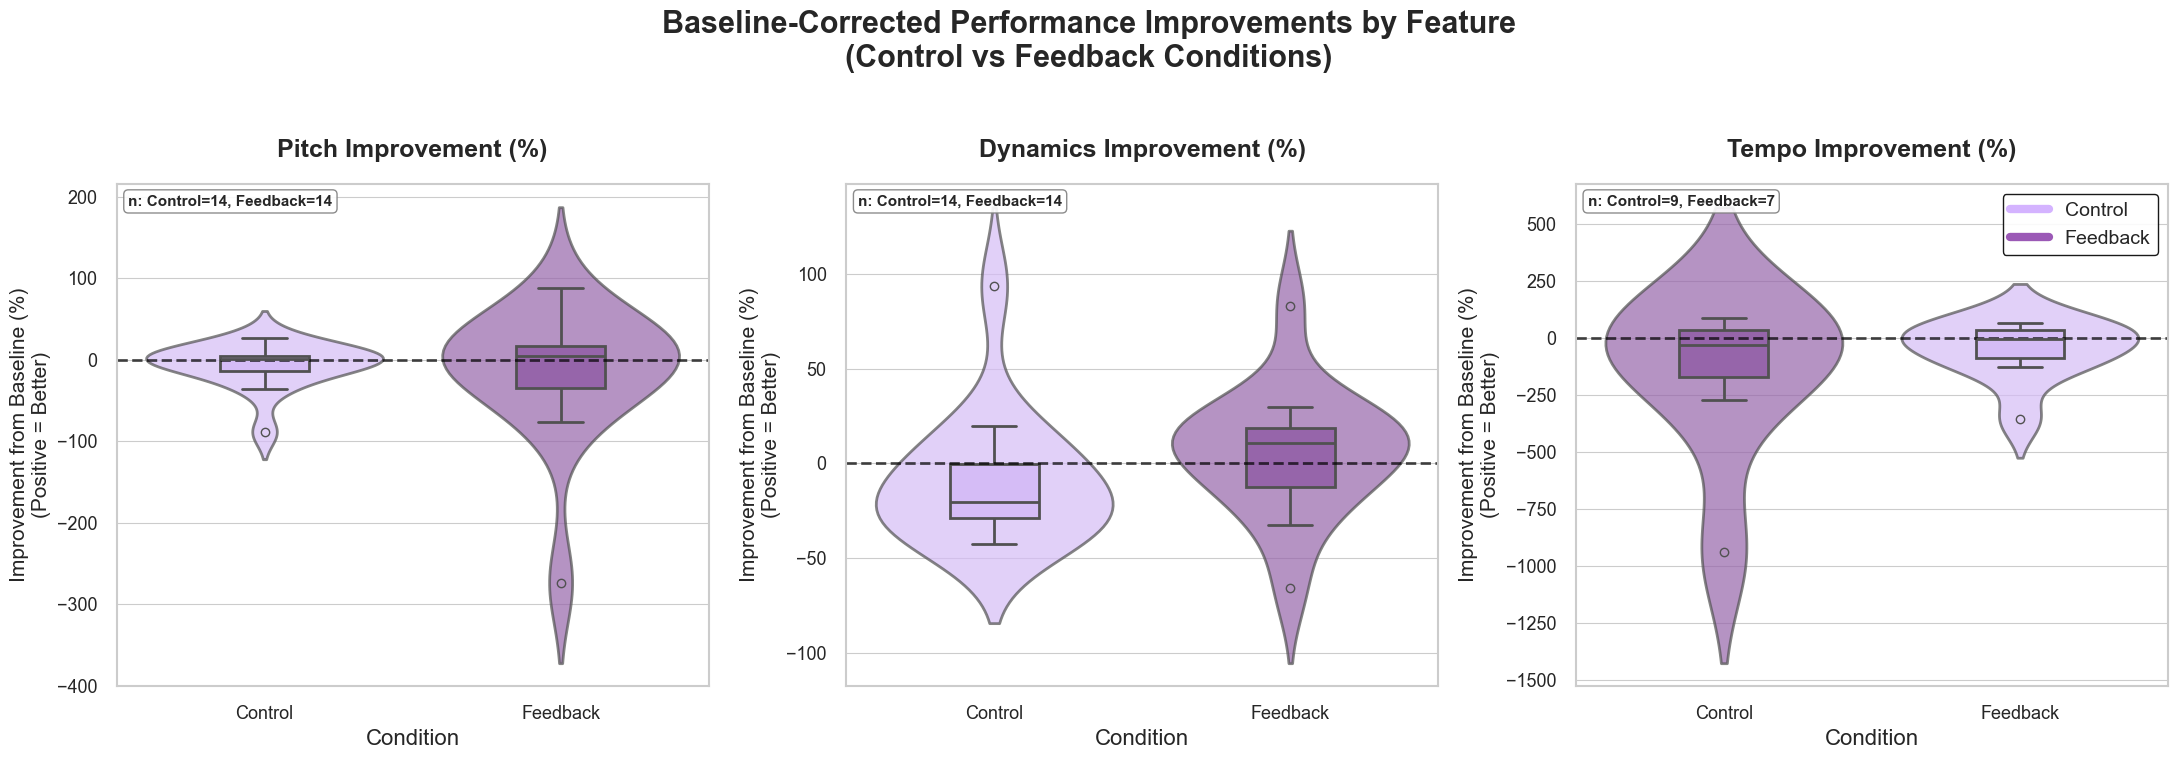

In [22]:
# 📊 Baseline-Corrected Improvements by Feature: Control vs Feedback (Publication-Ready Styling)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n📊 Creating Baseline-Corrected Improvement Graphs by Feature (Control vs Feedback, publication-ready styling)...")

# Publication-ready style
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white"
})

# Color palette (blue for control, purple for feedback)
cond_palette = {'none': "#D4B3FF", 'feedback': "#9B59B6"}

if 'df_improvements' in globals() and 'metric' in df_improvements.columns and 'percent_improvement' in df_improvements.columns:
    metrics = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch Improvement (%)', 'Dynamics Improvement (%)', 'Tempo Improvement (%)']

    fig, axes = plt.subplots(1, 3, figsize=(22, 8), sharey=False)
    fig.suptitle('Baseline-Corrected Performance Improvements by Feature\n(Control vs Feedback Conditions)', fontsize=22, fontweight='bold', y=0.95)

    for i, (metric, title) in enumerate(zip(metrics, feature_titles)):
        ax = axes[i]
        data = df_improvements[df_improvements['metric'] == metric]
        if data.empty:
            ax.text(0.5, 0.5, f'No {metric} improvement data', ha='center', va='center', transform=ax.transAxes, fontsize=16)
            ax.set_title(title, fontweight='bold', fontsize=18)
            continue

        # Violin plot for distribution, boxplot for median/quartiles
        sns.violinplot(data=data, x='feedback_type', y='percent_improvement',
                       ax=ax, palette=cond_palette, alpha=0.7, inner=None, linewidth=2)
        sns.boxplot(data=data, x='feedback_type', y='percent_improvement',
                    ax=ax, palette=cond_palette, width=0.3, linewidth=2)

        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_title(title, fontweight='bold', fontsize=18, pad=20)
        ax.set_xlabel('Condition', fontsize=16)
        ax.set_ylabel('Improvement from Baseline (%)\n(Positive = Better)', fontsize=15)
        ax.set_xticklabels(['Control', 'Feedback'], fontsize=13)
        ax.tick_params(axis='both', which='major', labelsize=13, width=2, length=6, pad=8)

        # Add sample sizes
        control_n = len(data[data['feedback_type'] == 'none'])
        feedback_n = len(data[data['feedback_type'] == 'feedback'])
        ax.text(0.02, 0.98, f"n: Control={control_n}, Feedback={feedback_n}",
                transform=ax.transAxes, fontsize=11, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9,
                          linewidth=1, edgecolor='gray'),
                verticalalignment='top')

        # Remove legend from all but last subplot
        if i != len(metrics) - 1 and ax.get_legend():
            ax.get_legend().remove()
        elif i == len(metrics) - 1:
            handles = [
                plt.Line2D([0], [0], color=cond_palette['none'], lw=6, label='Control'),
                plt.Line2D([0], [0], color=cond_palette['feedback'], lw=6, label='Feedback')
            ]
            ax.legend(handles=handles, loc='upper right', frameon=True, fontsize=14, framealpha=0.9, edgecolor='black')

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    fname = "baseline_corrected_improvement_by_feature.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"📊 Saved: {fname}")
    plt.show()
else:
    print("❌ Baseline-corrected improvement data not available. Please run the baseline analysis cell first.")


📊 Creating Baseline-Corrected Improvement Graphs by Feature and Experience Level (side-by-side, publication-ready styling)...


/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/Users/isabelleoktay/miniforge3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1081: RuntimeWarning: divide by zero encounter

📊 Saved: baseline_corrected_improvement_by_feature_and_experience.png


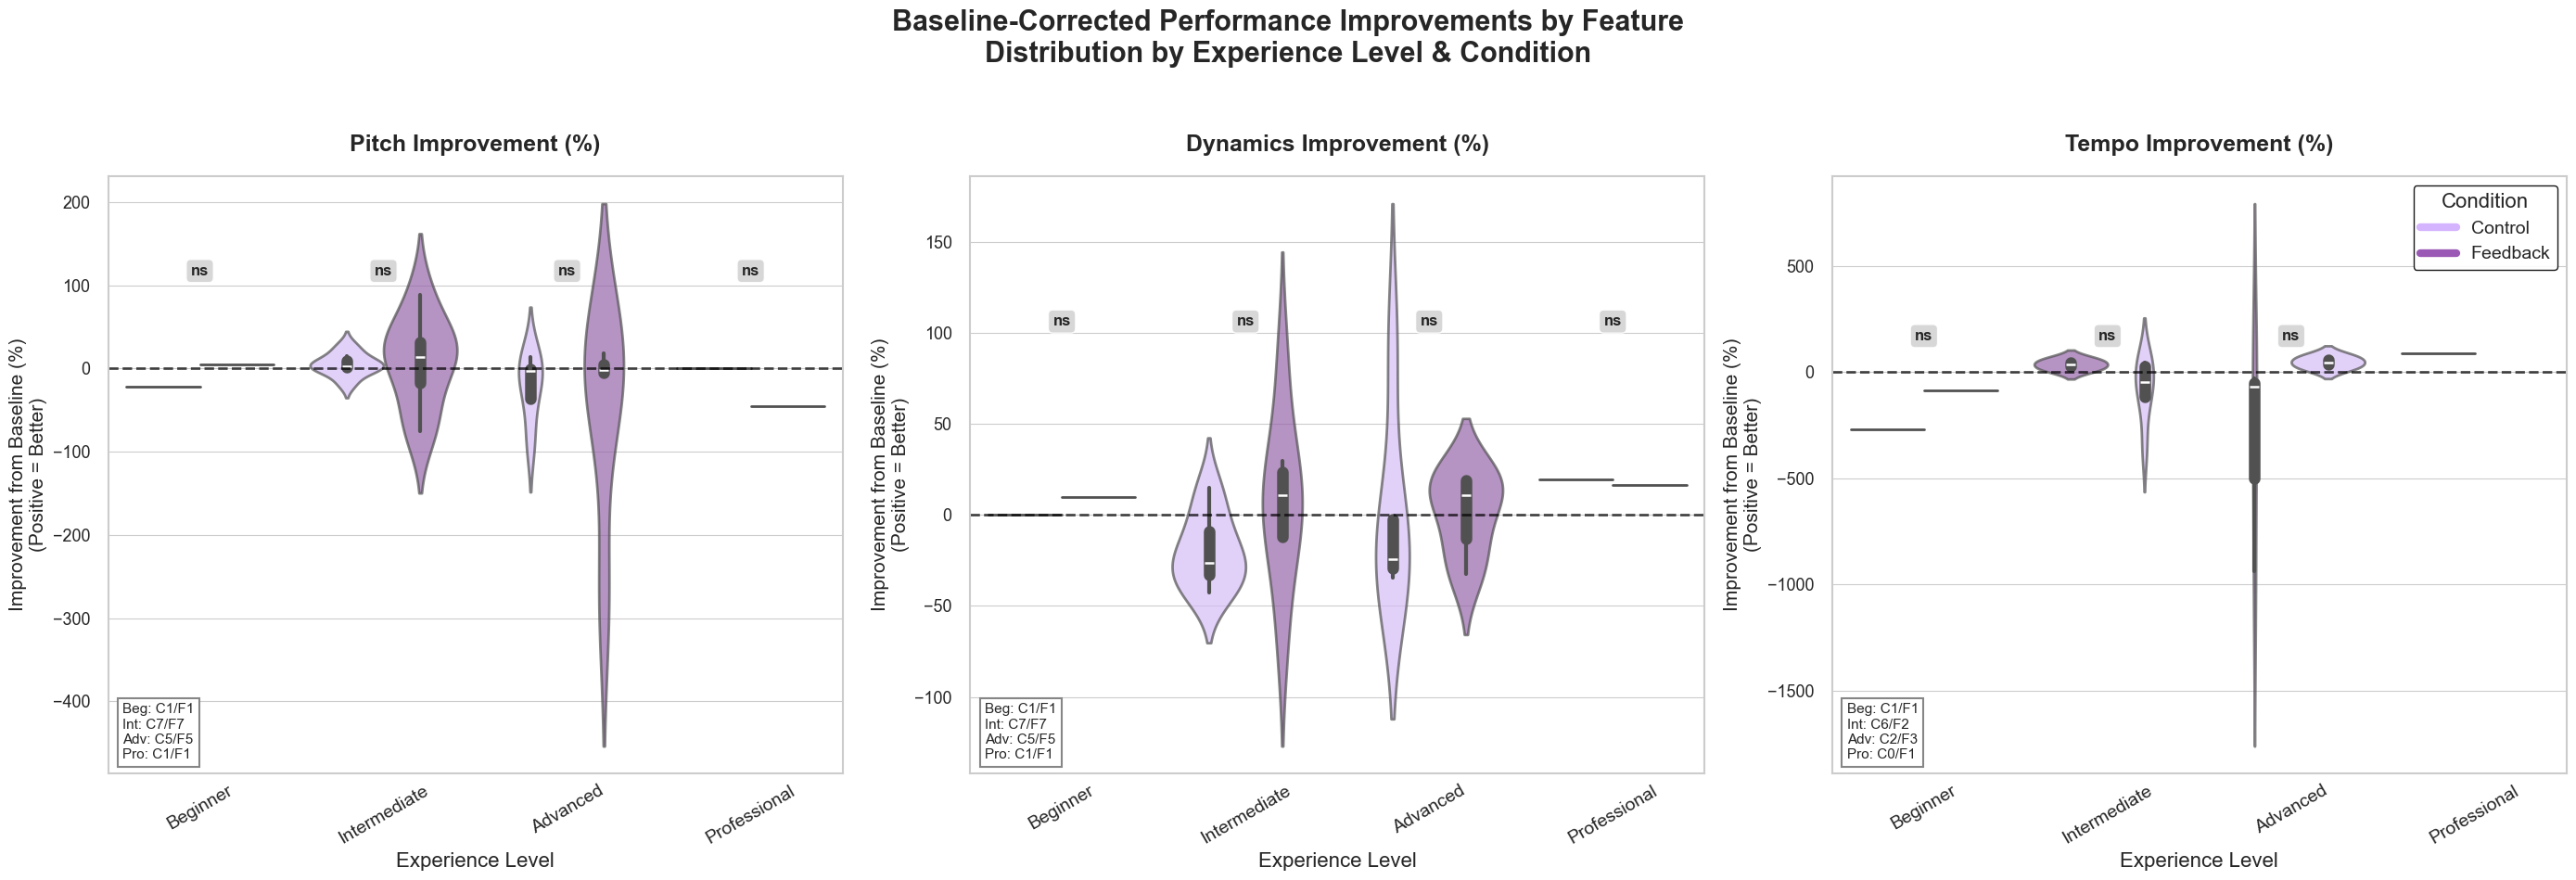

In [24]:
# 📊 Baseline-Corrected Improvements by Feature and Experience Level (Side-by-Side, Publication-Ready Styling)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print("\n📊 Creating Baseline-Corrected Improvement Graphs by Feature and Experience Level (side-by-side, publication-ready styling)...")

# Publication-ready style
sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white"
})

# Color palette (blue for control, purple for feedback)
cond_palette = {'none': "#D4B3FF", 'feedback': "#9B59B6"}

if (
    'df_improvements' in globals()
    and 'metric' in df_improvements.columns
    and 'percent_improvement' in df_improvements.columns
    and 'musicExperience' in df_improvements.columns
):
    metrics = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch Improvement (%)', 'Dynamics Improvement (%)', 'Tempo Improvement (%)']
    experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
    available_levels = [lvl for lvl in experience_order if lvl in df_improvements['musicExperience'].unique()]

    fig, axes = plt.subplots(1, 3, figsize=(28, 10), sharey=False)
    fig.suptitle('Baseline-Corrected Performance Improvements by Feature\nDistribution by Experience Level & Condition', fontsize=22, fontweight='bold', y=0.95)

    for i, (metric, title) in enumerate(zip(metrics, feature_titles)):
        ax = axes[i]
        data = df_improvements[df_improvements['metric'] == metric]
        data = data[data['musicExperience'].isin(available_levels)]
        if data.empty or len(available_levels) < 2:
            ax.text(0.5, 0.5, f'No {metric} improvement data\nor insufficient experience levels', ha='center', va='center', transform=ax.transAxes, fontsize=16)
            ax.set_title(title, fontweight='bold', fontsize=18)
            continue

        # Violin plot for distribution by experience level and condition
        sns.violinplot(
            data=data,
            x='musicExperience',
            y='percent_improvement',
            hue='feedback_type',
            order=available_levels,
            palette=cond_palette,
            alpha=0.7,
            inner='box',
            linewidth=2,
            ax=ax
        )
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_title(title, fontweight='bold', fontsize=18, pad=20)
        ax.set_xlabel('Experience Level', fontsize=16)
        ax.set_ylabel('Improvement from Baseline (%)\n(Positive = Better)', fontsize=15)
        ax.tick_params(axis='x', rotation=30, labelsize=14)
        ax.tick_params(axis='y', labelsize=13, width=2, length=6, pad=8)

        # Statistical annotation for each experience level
        y_max = data['percent_improvement'].max()
        y_min = data['percent_improvement'].min()
        y_range = y_max - y_min if y_max != y_min else 1
        for j, exp_level in enumerate(available_levels):
            level_data = data[data['musicExperience'] == exp_level]
            control_exp = level_data[level_data['feedback_type'] == 'none']['percent_improvement']
            feedback_exp = level_data[level_data['feedback_type'] == 'feedback']['percent_improvement']
            if len(control_exp) > 0 and len(feedback_exp) > 0:
                t_stat, p_val = stats.ttest_ind(feedback_exp, control_exp, equal_var=False, nan_policy='omit')
                sig_marker = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
                sig_color = 'darkred' if p_val < 0.001 else 'red' if p_val < 0.01 else 'orange' if p_val < 0.05 else 'lightgray'
                ax.text(j, y_max + y_range * 0.08, sig_marker,
                        ha='center', va='center', fontsize=12, fontweight='bold',
                        bbox=dict(boxstyle="round,pad=0.3", facecolor=sig_color, alpha=0.9))

        # Sample sizes per experience level
        samples = data.groupby(['musicExperience', 'feedback_type']).size().unstack(fill_value=0)
        sample_lines = []
        for exp in available_levels:
            c = int(samples.loc[exp, 'none']) if 'none' in samples.columns and exp in samples.index else 0
            f = int(samples.loc[exp, 'feedback']) if 'feedback' in samples.columns and exp in samples.index else 0
            sample_lines.append(f"{exp[:3]}: C{c}/F{f}")
        sample_text = "\n".join(sample_lines)
        ax.text(0.02, 0.02, sample_text, transform=ax.transAxes, fontsize=11,
                bbox=dict(facecolor='white', edgecolor='gray', pad=4, alpha=0.95, linewidth=1.5),
                verticalalignment='bottom', horizontalalignment='left')

        # Legend only on last subplot
        if i == len(metrics) - 1:
            handles = [
                plt.Line2D([0], [0], color=cond_palette['none'], lw=6, label='Control'),
                plt.Line2D([0], [0], color=cond_palette['feedback'], lw=6, label='Feedback')
            ]
            ax.legend(handles=handles, title='Condition', loc='upper right', frameon=True, fontsize=14, title_fontsize=16, framealpha=0.9, edgecolor='black')
        else:
            if ax.get_legend():
                ax.get_legend().remove()

    plt.tight_layout(rect=[0, 0, 1, 0.92])
    fname = "baseline_corrected_improvement_by_feature_and_experience.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"📊 Saved: {fname}")
    plt.show()
else:
    print("❌ Baseline-corrected improvement data with experience levels not available. Please run the baseline analysis and ensure experience mapping is present.")

In [25]:
# 📊 CREATE Z-SCORE STANDARDIZED IMPROVEMENT DATA
# Generate standardized improvement metrics for cross-feature comparison

import pandas as pd
import numpy as np

print("🔄 Creating z-score standardized improvement data...")
print("=" * 60)

# Check what improvement data we have available
print(f"📋 Available DataFrames:")
print(f"   • df_improvements: {len(df_improvements)} records" if 'df_improvements' in globals() else "   • df_improvements: NOT AVAILABLE")
print(f"   • df_metrics: {len(df_metrics)} records" if 'df_metrics' in globals() else "   • df_metrics: NOT AVAILABLE")

if 'df_improvements' in globals() and len(df_improvements) > 0:
    
    print(f"\n📊 df_improvements columns: {list(df_improvements.columns)}")
    print(f"📊 df_improvements shape: {df_improvements.shape}")
    print(f"📊 Sample data:")
    print(df_improvements.head(3))
    
    # Create standardized improvement data
    standardized_data = []
    
    # The df_improvements has a different structure with 'metric' and 'percent_improvement' columns
    # We need to process each feature separately
    
    print(f"\n🎯 Processing improvement metrics using 'metric' column...")
    
    # Get unique features available
    available_features = df_improvements['metric'].unique()
    print(f"   Available features: {list(available_features)}")
    
    for feature_name in available_features:
        # Get all improvement values for this feature
        feature_data = df_improvements[df_improvements['metric'] == feature_name]
        feature_improvements = feature_data['percent_improvement'].dropna()
        
        if len(feature_improvements) > 0:
            # Calculate mean and standard deviation for z-score normalization
            mean_improvement = feature_improvements.mean()
            std_improvement = feature_improvements.std()
            
            print(f"   • {feature_name.title()}: {len(feature_improvements)} records")
            print(f"     Mean: {mean_improvement:.4f}%, Std: {std_improvement:.4f}%")
            
            # Create standardized records for each subject
            for _, row in feature_data.iterrows():
                if pd.notna(row['percent_improvement']):
                    # Calculate z-score
                    if std_improvement > 0:
                        z_score = (row['percent_improvement'] - mean_improvement) / std_improvement
                    else:
                        z_score = 0  # Handle case where std is 0
                    
                    standardized_data.append({
                        'subjectId': row['subjectId'],
                        'feedback_type': row['feedback_type'],
                        'feature': feature_name,
                        'raw_improvement': row['percent_improvement'],
                        'standardized_improvement': z_score,
                        'musicExperience': row.get('musicExperience', 'Unknown')
                    })
        
        else:
            print(f"   • {feature_name.title()}: No valid data found")
    
    # Create the standardized DataFrame
    if standardized_data:
        df_standardized_improvements = pd.DataFrame(standardized_data)
        
        print(f"\n✅ Created standardized improvement dataset!")
        print(f"📊 Total records: {len(df_standardized_improvements)}")
        print(f"📊 Features: {list(df_standardized_improvements['feature'].unique())}")
        print(f"📊 Feedback types: {list(df_standardized_improvements['feedback_type'].unique())}")
        print(f"📊 Experience levels: {list(df_standardized_improvements['musicExperience'].unique())}")
        
        # Show summary statistics
        print(f"\n📈 STANDARDIZED IMPROVEMENT SUMMARY:")
        print("-" * 50)
        
        summary_by_feature = df_standardized_improvements.groupby(['feature', 'feedback_type'])['standardized_improvement'].agg([
            'count', 'mean', 'std', 'min', 'max'
        ]).round(3)
        
        print(summary_by_feature)
        
        # Show sample of the data
        print(f"\n🔍 SAMPLE STANDARDIZED DATA:")
        print("-" * 40)
        print(df_standardized_improvements.head(6))
        
        # Summary by experience level (if available)
        if 'musicExperience' in df_standardized_improvements.columns:
            exp_counts = df_standardized_improvements.groupby('musicExperience').size()
            print(f"\n👥 RECORDS BY EXPERIENCE LEVEL:")
            print("-" * 35)
            for exp, count in exp_counts.items():
                print(f"   • {exp}: {count} records")
        
        print(f"\n💡 Z-score interpretation:")
        print(f"   • Positive z-scores = Better than average improvement")
        print(f"   • Negative z-scores = Worse than average improvement") 
        print(f"   • Zero z-score = Average improvement")
        print(f"   • All features now comparable on same scale")
        
    else:
        print(f"❌ No standardized data could be created")
        df_standardized_improvements = pd.DataFrame()

else:
    print(f"❌ df_improvements not available or empty")
    df_standardized_improvements = pd.DataFrame()

print(f"\n🎯 Standardization complete! Ready for z-score analysis.")

🔄 Creating z-score standardized improvement data...
📋 Available DataFrames:
   • df_improvements: 72 records
   • df_metrics: 56 records

📊 df_improvements columns: ['subjectId', 'feedback_type', 'metric', 'percent_improvement', 'before_value', 'after_value', 'musicExperience']
📊 df_improvements shape: (72, 7)
📊 Sample data:
  subjectId feedback_type    metric  percent_improvement  before_value  \
0  w4m19emj          none     pitch            -1.204049     116.99323   
1  w4m19emj          none  dynamics           -24.469142       0.09782   
2  w4m19emj      feedback     pitch            17.757301     110.72871   

   after_value musicExperience  
0   118.401886        Advanced  
1     0.121756        Advanced  
2    91.066280        Advanced  

🎯 Processing improvement metrics using 'metric' column...
   Available features: ['pitch', 'dynamics', 'tempo']
   • Pitch: 28 records
     Mean: -12.4230%, Std: 61.5397%
   • Dynamics: 28 records
     Mean: -1.2569%, Std: 34.5432%
   • Tempo:

/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/2984354678.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='feedback_type', y='standardized_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/2984354678.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='feedback_type', y='standardized_improvement',
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/T/ipykernel_92925/2984354678.py:61: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Control', 'Feedback'], fontsize=13)
/var/folders/_0/43hbbhf92ms0v84d8mnpnnjr0000gn/

📊 Saved: zscore_improvement_by_feature_clean_aligned.png


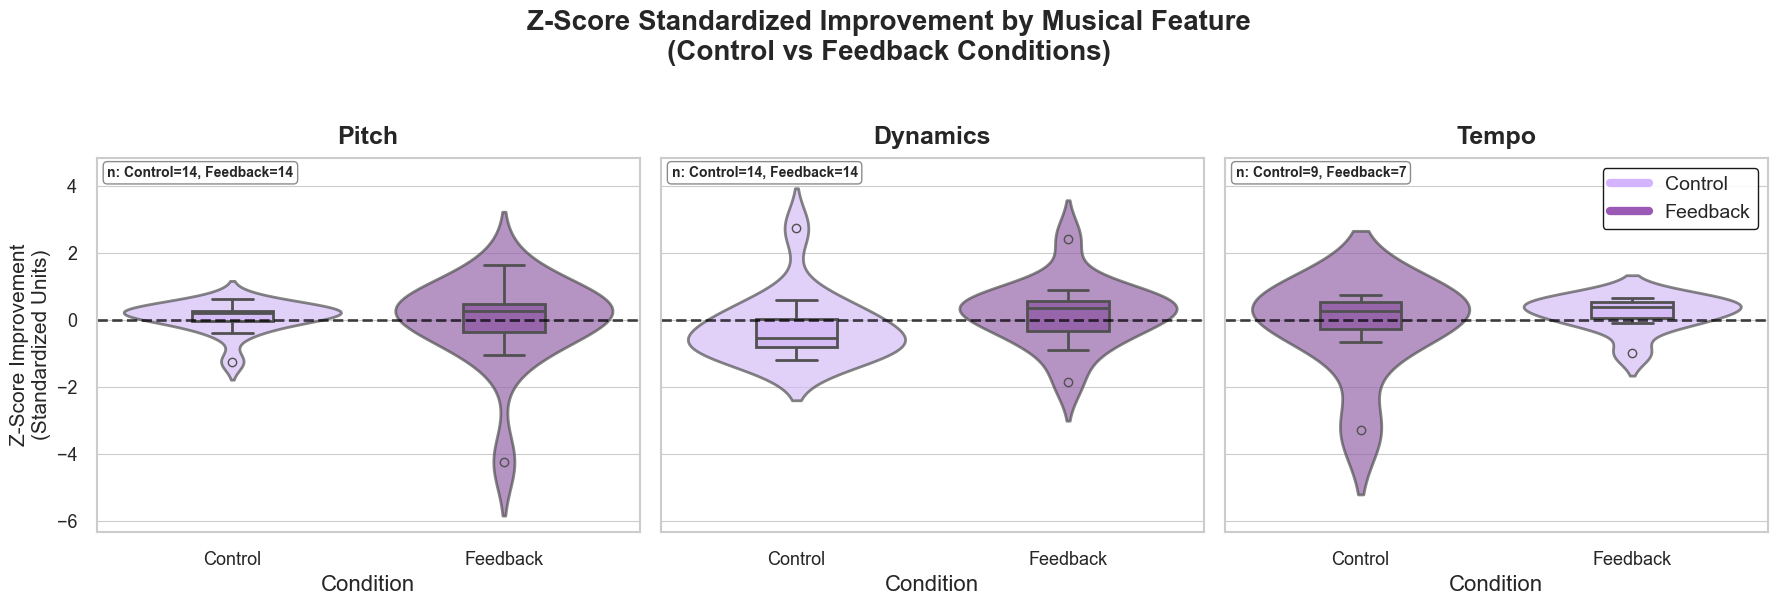

In [32]:
# 📊 Z-Score Standardized Improvement by Musical Feature (Cleaned, Shared Y-Limits)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white"
})

cond_palette = {'none': "#D4B3FF", 'feedback': "#9B59B6"}

if 'df_standardized_improvements' in globals() and len(df_standardized_improvements) > 0:
    features = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch', 'Dynamics', 'Tempo']

    # Compute global y-limits across all features
    all_y_min = df_standardized_improvements['standardized_improvement'].min()
    all_y_max = df_standardized_improvements['standardized_improvement'].max()
    y_range = all_y_max - all_y_min if all_y_max != all_y_min else 1
    global_ylim = (all_y_min - 0.3 * y_range, all_y_max + 0.3 * y_range)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    fig.suptitle(
        'Z-Score Standardized Improvement by Musical Feature\n(Control vs Feedback Conditions)',
        fontsize=20, fontweight='bold', y=1.01  # moved closer to the top of the plots
    )

    for i, (feature, title) in enumerate(zip(features, feature_titles)):
        ax = axes[i]
        data = df_standardized_improvements[df_standardized_improvements['feature'] == feature]
        if data.empty:
            ax.text(0.5, 0.5, f'No {feature} data', ha='center', va='center', transform=ax.transAxes, fontsize=16)
            ax.set_title(title, fontweight='bold', fontsize=18)
            continue

        sns.violinplot(data=data, x='feedback_type', y='standardized_improvement',
                       ax=ax, palette=cond_palette, alpha=0.7, inner=None, linewidth=2)
        sns.boxplot(data=data, x='feedback_type', y='standardized_improvement',
                    ax=ax, palette=cond_palette, width=0.3, linewidth=2)

        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_title(f'{title}', fontweight='bold', fontsize=18, pad=10)
        ax.set_xlabel('Condition', fontsize=16)
        if i == 0:
            ax.set_ylabel('Z-Score Improvement\n(Standardized Units)', fontsize=15)
        else:
            ax.set_ylabel('')
        ax.set_xticklabels(['Control', 'Feedback'], fontsize=13)
        ax.tick_params(axis='both', which='major', labelsize=13, width=2, length=6, pad=8)

        # Add sample sizes
        control_n = len(data[data['feedback_type'] == 'none'])
        feedback_n = len(data[data['feedback_type'] == 'feedback'])
        ax.text(0.02, 0.98, f"n: Control={control_n}, Feedback={feedback_n}",
                transform=ax.transAxes, fontsize=10, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9,
                          linewidth=1, edgecolor='gray'),
                verticalalignment='top')

        # Legend only on last subplot
        if i == len(features) - 1:
            handles = [
                plt.Line2D([0], [0], color=cond_palette['none'], lw=6, label='Control'),
                plt.Line2D([0], [0], color=cond_palette['feedback'], lw=6, label='Feedback')
            ]
            ax.legend(handles=handles, loc='upper right', frameon=True, fontsize=14, framealpha=0.9, edgecolor='black')
        else:
            if ax.get_legend():
                ax.get_legend().remove()

        # Apply global y-limits
        ax.set_ylim(global_ylim)

    plt.tight_layout(rect=[0, 0, 1, 0.98])  # reduce top padding
    fname = "zscore_improvement_by_feature_clean_aligned.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"📊 Saved: {fname}")
    plt.show()
    
else:
    print("❌ No standardized improvement data available. Please run the z-score data creation cell first.")


📊 Saved: zscore_improvement_by_experience_and_feature.png


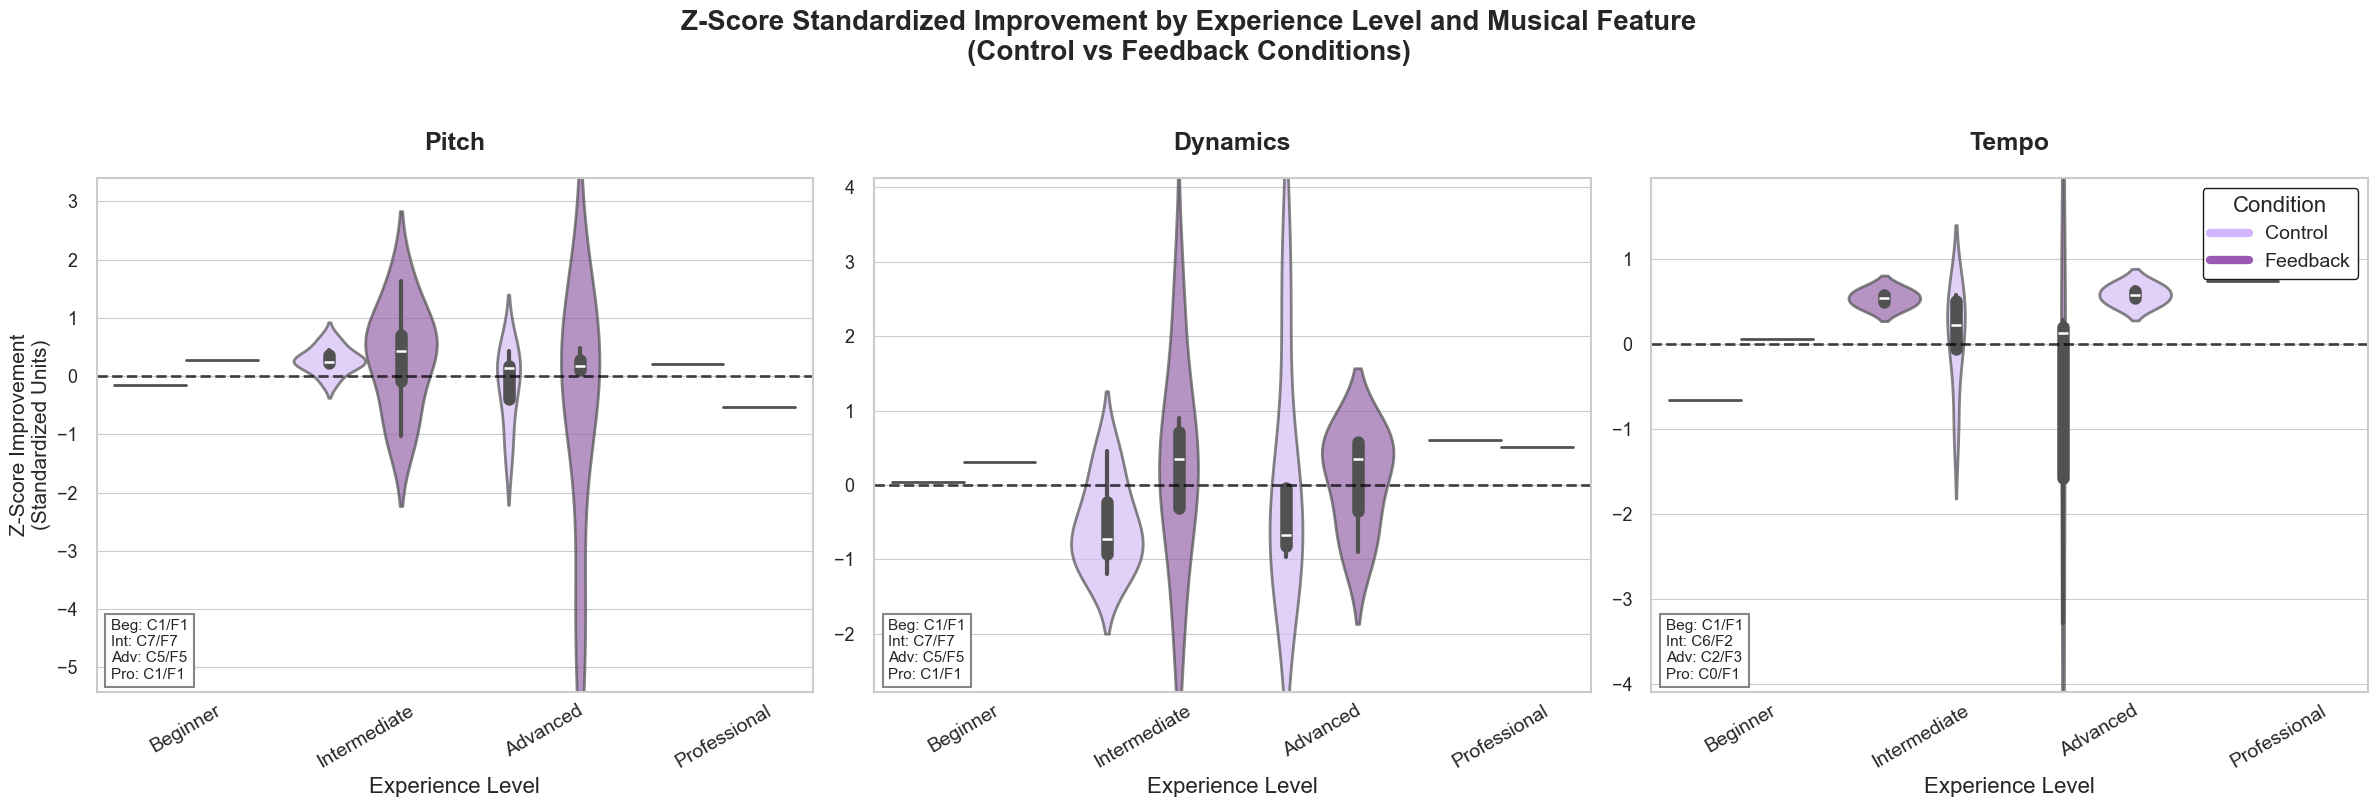

In [36]:
# 📊 Z-Score Standardized Improvement by Experience Level and Musical Feature (Control vs Feedback, simplified)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.size": 14,
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "axes.linewidth": 1.5,
    "xtick.direction": "out",
    "ytick.direction": "out",
    "figure.facecolor": "white"
})

cond_palette = {'none': "#D4B3FF", 'feedback': "#9B59B6"}
experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']

if 'df_standardized_improvements' in globals() and len(df_standardized_improvements) > 0:
    features = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch', 'Dynamics', 'Tempo']
    available_levels = [lvl for lvl in experience_order if lvl in df_standardized_improvements['musicExperience'].unique()]

    fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=False)
    fig.suptitle('Z-Score Standardized Improvement by Experience Level and Musical Feature\n(Control vs Feedback Conditions)', fontsize=20, fontweight='bold', y=1.01)

    for i, (feature, title) in enumerate(zip(features, feature_titles)):
        ax = axes[i]
        data = df_standardized_improvements[
            (df_standardized_improvements['feature'] == feature) &
            (df_standardized_improvements['musicExperience'].isin(available_levels))
        ]
        if data.empty or len(available_levels) < 2:
            ax.text(0.5, 0.5, f'No {feature} data\nor insufficient experience levels', ha='center', va='center', transform=ax.transAxes, fontsize=16)
            ax.set_title(title, fontweight='bold', fontsize=18)
            continue

        sns.violinplot(
            data=data,
            x='musicExperience',
            y='standardized_improvement',
            hue='feedback_type',
            order=available_levels,
            palette=cond_palette,
            alpha=0.7,
            inner='box',
            linewidth=2,
            ax=ax
        )
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
        ax.set_title(title, fontweight='bold', fontsize=18, pad=20)
        ax.set_xlabel('Experience Level', fontsize=16)
        if i == 0:
            ax.set_ylabel('Z-Score Improvement\n(Standardized Units)', fontsize=15)
        else:
            ax.set_ylabel('')
        ax.tick_params(axis='x', rotation=30, labelsize=14)
        ax.tick_params(axis='y', labelsize=13, width=2, length=6, pad=8)

        # Sample sizes per experience level
        samples = data.groupby(['musicExperience', 'feedback_type']).size().unstack(fill_value=0)
        sample_lines = []
        for exp in available_levels:
            c = int(samples.loc[exp, 'none']) if 'none' in samples.columns and exp in samples.index else 0
            f = int(samples.loc[exp, 'feedback']) if 'feedback' in samples.columns and exp in samples.index else 0
            sample_lines.append(f"{exp[:3]}: C{c}/F{f}")
        sample_text = "\n".join(sample_lines)
        ax.text(0.02, 0.02, sample_text, transform=ax.transAxes, fontsize=11,
                bbox=dict(facecolor='white', edgecolor='gray', pad=4, alpha=0.95, linewidth=1.5),
                verticalalignment='bottom', horizontalalignment='left')

        # Legend only on last subplot
        if i == len(features) - 1:
            handles = [
                plt.Line2D([0], [0], color=cond_palette['none'], lw=6, label='Control'),
                plt.Line2D([0], [0], color=cond_palette['feedback'], lw=6, label='Feedback')
            ]
            ax.legend(handles=handles, title='Condition', loc='upper right', frameon=True, fontsize=14, title_fontsize=16, framealpha=0.9, edgecolor='black')
        else:
            if ax.get_legend():
                ax.get_legend().remove()

        # Set y-limits with padding
        y_max = data['standardized_improvement'].max()
        y_min = data['standardized_improvement'].min()
        y_range = y_max - y_min if y_max != y_min else 1
        ax.set_ylim(y_min - y_range * 0.2, y_max + y_range * 0.3)

    plt.tight_layout(rect=[0, 0, 1, 0.98])
    fname = "zscore_improvement_by_experience_and_feature.png"
    plt.savefig(fname, dpi=300, bbox_inches='tight', facecolor='white')
    print(f"📊 Saved: {fname}")
    plt.show()
else:
    print("❌ No standardized improvement data available. Please run the z-score data creation cell first.")

In [38]:
# 📊 Z-Score Statistical Analysis: Overall & By Experience Level

import pandas as pd
import numpy as np
from scipy import stats

print("="*80)
print("Z-SCORE STANDARDIZED IMPROVEMENT: STATISTICAL ANALYSIS")
print("="*80)

if 'df_standardized_improvements' in globals() and len(df_standardized_improvements) > 0:
    features = ['pitch', 'dynamics', 'tempo']
    feature_titles = ['Pitch', 'Dynamics', 'Tempo']
    experience_order = ['Beginner', 'Intermediate', 'Advanced', 'Professional']

    # --- Overall (Control vs Feedback for each feature) ---
    print("\n📊 OVERALL ANALYSIS (Control vs Feedback for each feature):")
    overall_results = []
    for feature, title in zip(features, feature_titles):
        data = df_standardized_improvements[df_standardized_improvements['feature'] == feature]
        ctrl = data[data['feedback_type'] == 'none']['standardized_improvement']
        fb = data[data['feedback_type'] == 'feedback']['standardized_improvement']
        if len(ctrl) > 1 and len(fb) > 1:
            t_stat, p_t = stats.ttest_ind(fb, ctrl, equal_var=False, nan_policy='omit')
            u_stat, p_u = stats.mannwhitneyu(fb, ctrl, alternative='two-sided')
            p_cons = max(p_t if not np.isnan(p_t) else 1.0, p_u if not np.isnan(p_u) else 1.0)
            pooled_std = np.sqrt(((len(ctrl)-1)*ctrl.var() + (len(fb)-1)*fb.var()) / max(1, (len(ctrl)+len(fb)-2)))
            cohens_d = (fb.mean() - ctrl.mean()) / pooled_std if pooled_std > 0 else 0.0
            sig = "***" if p_cons < 0.001 else "**" if p_cons < 0.01 else "*" if p_cons < 0.05 else "ns"
            overall_results.append({
                'Feature': title,
                'Mean_Control': ctrl.mean(),
                'Mean_Feedback': fb.mean(),
                'Cohens_d': cohens_d,
                'p_value': p_cons,
                'Significance': sig,
                'N_Control': len(ctrl),
                'N_Feedback': len(fb)
            })
            print(f"\n{title}:")
            print(f"  Control Mean: {ctrl.mean():+.3f} (n={len(ctrl)})")
            print(f"  Feedback Mean: {fb.mean():+.3f} (n={len(fb)})")
            print(f"  Difference: {fb.mean()-ctrl.mean():+.3f} z-score")
            print(f"  Cohen's d: {cohens_d:.3f}")
            print(f"  p-value: {p_cons:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
        else:
            print(f"\n{title}: Not enough data for statistical comparison.")

    # --- By Experience Level ---
    print("\n📊 EXPERIENCE-LEVEL ANALYSIS (Control vs Feedback within each experience level and feature):")
    exp_results = []
    for feature, title in zip(features, feature_titles):
        for exp in experience_order:
            data = df_standardized_improvements[
                (df_standardized_improvements['feature'] == feature) &
                (df_standardized_improvements['musicExperience'] == exp)
            ]
            ctrl = data[data['feedback_type'] == 'none']['standardized_improvement']
            fb = data[data['feedback_type'] == 'feedback']['standardized_improvement']
            if len(ctrl) > 1 and len(fb) > 1:
                t_stat, p_t = stats.ttest_ind(fb, ctrl, equal_var=False, nan_policy='omit')
                u_stat, p_u = stats.mannwhitneyu(fb, ctrl, alternative='two-sided')
                p_cons = max(p_t if not np.isnan(p_t) else 1.0, p_u if not np.isnan(p_u) else 1.0)
                pooled_std = np.sqrt(((len(ctrl)-1)*ctrl.var() + (len(fb)-1)*fb.var()) / max(1, (len(ctrl)+len(fb)-2)))
                cohens_d = (fb.mean() - ctrl.mean()) / pooled_std if pooled_std > 0 else 0.0
                sig = "***" if p_cons < 0.001 else "**" if p_cons < 0.01 else "*" if p_cons < 0.05 else "ns"
                exp_results.append({
                    'Feature': title,
                    'Experience': exp,
                    'Mean_Control': ctrl.mean(),
                    'Mean_Feedback': fb.mean(),
                    'Cohens_d': cohens_d,
                    'p_value': p_cons,
                    'Significance': sig,
                    'N_Control': len(ctrl),
                    'N_Feedback': len(fb)
                })
                print(f"\n{title} - {exp}:")
                print(f"  Control Mean: {ctrl.mean():+.3f} (n={len(ctrl)})")
                print(f"  Feedback Mean: {fb.mean():+.3f} (n={len(fb)})")
                print(f"  Difference: {fb.mean()-ctrl.mean():+.3f} z-score")
                print(f"  Cohen's d: {cohens_d:.3f}")
                print(f"  p-value: {p_cons:.4f} ({sig}) {'Significant' if sig != 'ns' else 'Not significant'}")
            else:
                print(f"\n{title} - {exp}: Not enough data for statistical comparison.")

    # --- Summary Table ---
    print("\n🗂️ SUMMARY TABLE (Overall):")
    if overall_results:
        df_overall = pd.DataFrame(overall_results)
        print(df_overall[['Feature','Mean_Control','Mean_Feedback','Cohens_d','p_value','Significance','N_Control','N_Feedback']].round(3).to_string(index=False))
    print("\n🗂️ SUMMARY TABLE (By Experience Level):")
    if exp_results:
        df_exp = pd.DataFrame(exp_results)
        print(df_exp[['Feature','Experience','Mean_Control','Mean_Feedback','Cohens_d','p_value','Significance','N_Control','N_Feedback']].round(3).to_string(index=False))

    print("\nLegend:")
    print("  - p-value: Probability that observed difference is due to chance")
    print("  - Cohen's d: Effect size (0.2=small, 0.5=medium, 0.8=large)")
    print("  - Significance: *** (p<0.001), ** (p<0.01), * (p<0.05), ns (not significant)")
    print("\nInterpretation:")
    print("  - Significant results (p<0.05) indicate a reliable difference between groups.")
    print("  - Cohen's d quantifies the magnitude of the difference.")
    print("  - If all results are 'ns', there is no statistically significant difference between conditions or experience levels for z-score improvement.")
else:
    print("❌ No standardized improvement data available. Please run the z-score data creation cell first.")

Z-SCORE STANDARDIZED IMPROVEMENT: STATISTICAL ANALYSIS

📊 OVERALL ANALYSIS (Control vs Feedback for each feature):

Pitch:
  Control Mean: +0.082 (n=14)
  Feedback Mean: -0.082 (n=14)
  Difference: -0.165 z-score
  Cohen's d: -0.162
  p-value: 0.6739 (ns) Not significant

Dynamics:
  Control Mean: -0.204 (n=14)
  Feedback Mean: +0.204 (n=14)
  Difference: +0.408 z-score
  Cohen's d: 0.409
  p-value: 0.2888 (ns) Not significant

Tempo:
  Control Mean: +0.190 (n=9)
  Feedback Mean: -0.244 (n=7)
  Difference: -0.434 z-score
  Cohen's d: -0.431
  p-value: 1.0000 (ns) Not significant

📊 EXPERIENCE-LEVEL ANALYSIS (Control vs Feedback within each experience level and feature):

Pitch - Beginner: Not enough data for statistical comparison.

Pitch - Intermediate:
  Control Mean: +0.280 (n=7)
  Feedback Mean: +0.327 (n=7)
  Difference: +0.047 z-score
  Cohen's d: 0.072
  p-value: 0.8961 (ns) Not significant

Pitch - Advanced:
  Control Mean: -0.172 (n=5)
  Feedback Mean: -0.636 (n=5)
  Differenc

In [ ]:
# 📊 SELF-AWARENESS: PERCEIVED VS OBJECTIVE PERFORMANCE ANALYSIS

import json
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

print("df_perceived columns:", df_perceived.columns)
print("df_improvements columns:", df_improvements.columns)

# Load self ratings from data-analysis/data/data.json (robust path search)
json_paths = [
    "data-analysis/data/data.json",
    "data.json",
    "./data/data.json",
    "../data-analysis/data/data.json",
    "../../data-analysis/data/data.json"
]
ratings_data = None
for p in json_paths:
    try:
        with open(p, "r") as f:
            ratings_data = json.load(f)
        print(f"✅ Loaded self ratings from: {p}")
        break
    except Exception:
        continue
if ratings_data is None:
    print("❌ Could not find data.json with self ratings.")
    ratings_data = []

# Build DataFrame for perceived ratings (before/after)
perceived_rows = []
for entry in ratings_data:
    subj = entry.get('subjectId') or (entry.get('data') or {}).get('subjectId')
    music_exp = entry.get('musicExperience') or (entry.get('data') or {}).get('musicExperience')
    for condition in ['feedback', 'none']:
        cond_block = (entry.get('data') or {}).get(condition, {})
        for metric in ['pitch', 'dynamics', 'tempo']:
            before = cond_block.get('before', {}).get(metric, {}).get('performanceRating')
            after = cond_block.get('after', {}).get(metric, {}).get('performanceRating')
            if before is not None and after is not None:
                perceived_rows.append({
                    'subjectId': subj,
                    'feedback_type': condition,
                    'metric': metric,
                    'perceived_improvement': after - before,
                    'before_rating': before,
                    'after_rating': after,
                    'musicExperience': music_exp
                })
df_perceived = pd.DataFrame(perceived_rows)
print(f"✅ Perceived ratings loaded: {len(df_perceived)} records")
print("df_perceived columns:", df_perceived.columns)

# --- Merge with objective improvements ---
if 'df_improvements' in globals() and len(df_improvements) > 0:
    # Fix column names for merge
    if 'subject_id' in df_improvements.columns:
        df_improvements.rename(columns={'subject_id': 'subjectId'}, inplace=True)
    if 'feature' in df_improvements.columns and 'metric' not in df_improvements.columns:
        df_improvements.rename(columns={'feature': 'metric'}, inplace=True)
    if 'subject_id' in df_perceived.columns:
        df_perceived.rename(columns={'subject_id': 'subjectId'}, inplace=True)
    if 'feature' in df_perceived.columns and 'metric' not in df_perceived.columns:
        df_perceived.rename(columns={'feature': 'metric'}, inplace=True)

    # Only keep necessary columns for merge
    merge_cols = ['subjectId', 'metric']
    df_perceived = df_perceived[[c for c in df_perceived.columns if c in merge_cols or c.startswith('perceived') or c.endswith('_rating')]]
    df_improvements = df_improvements[[c for c in df_improvements.columns if c in merge_cols or 'percent_improvement' in c]]

    merged = pd.merge(
        df_perceived,
        df_improvements,
        on=['subjectId', 'metric'],
        how='inner'
    )
    print(f"\n🔗 Merged {len(merged)} records for perceived vs objective analysis.")

    # Pearson correlation for each metric
    for metric in ['pitch', 'dynamics', 'tempo']:
        subset = merged[merged['metric'] == metric]
        if len(subset) > 2:
            corr, pval = pearsonr(subset['perceived_improvement'], subset['percent_improvement'])
            print(f"\n{metric.title()} - Pearson r (perceived vs objective): r={corr:.3f}, p={pval:.4f}")
            plt.figure(figsize=(6,4))
            sns.scatterplot(
                x='perceived_improvement',
                y='percent_improvement',
                data=subset
            )
            plt.title(f'{metric.title()} Perceived vs Objective Improvement\nr={corr:.2f}, p={pval:.3f}')
            plt.xlabel('Perceived Improvement (Self Rating)')
            plt.ylabel('Objective Improvement (%)')
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()
        else:
            print(f"\n{metric.title()}: Not enough data for correlation analysis.")

    # --- Z-score standardized improvement analysis ---
    if 'df_standardized_improvements' in globals() and len(df_standardized_improvements) > 0:
        # Fix column names for merge
        if 'subject_id' in df_standardized_improvements.columns:
            df_standardized_improvements.rename(columns={'subject_id': 'subjectId'}, inplace=True)
        if 'feature' in df_standardized_improvements.columns and 'metric' not in df_standardized_improvements.columns:
            df_standardized_improvements.rename(columns={'feature': 'metric'}, inplace=True)

        merged_z = pd.merge(
            df_perceived,
            df_standardized_improvements,
            left_on=['subjectId', 'metric'],
            right_on=['subjectId', 'metric'],
            how='inner'
        )
        print(f"\n🔗 Merged {len(merged_z)} records for perceived vs z-score analysis.")
        for metric in ['pitch', 'dynamics', 'tempo']:
            subset = merged_z[merged_z['metric'] == metric]
            if len(subset) > 2:
                corr, pval = pearsonr(subset['perceived_improvement'], subset['standardized_improvement'])
                print(f"\n{metric.title()} - Pearson r (perceived vs z-score): r={corr:.3f}, p={pval:.4f}")
                plt.figure(figsize=(6,4))
                sns.scatterplot(
                    x='perceived_improvement',
                    y='standardized_improvement',
                    data=subset
                )
                plt.title(f'{metric.title()} Perceived vs Z-Score Improvement\nr={corr:.2f}, p={pval:.3f}')
                plt.xlabel('Perceived Improvement (Self Rating)')
                plt.ylabel('Objective Z-Score Improvement')
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()
            else:
                print(f"\n{metric.title()}: Not enough data for z-score correlation analysis.")
    else:
        print("⚠️ df_standardized_improvements not available. Run z-score cell first.")

    # --- Summary Table ---
    print("\n🗂️ SUMMARY TABLE (Perceived vs Objective):")
    summary_rows = []
    for metric in ['pitch', 'dynamics', 'tempo']:
        subset = merged[merged['metric'] == metric]
        if len(subset) > 2:
            corr, pval = pearsonr(subset['perceived_improvement'], subset['percent_improvement'])
            summary_rows.append({
                'Metric': metric.title(),
                'N': len(subset),
                'Pearson_r': corr,
                'p_value': pval
            })
    if summary_rows:
        summary_df = pd.DataFrame(summary_rows)
        print(summary_df.round(3).to_string(index=False))
    else:
        print("No sufficient data for summary table.")

else:
    print("❌ df_improvements not available. Please run the baseline analysis cell first.")

df_perceived columns: Index([], dtype='int64')
df_improvements columns: Index(['subjectId', 'metric', 'percent_improvement'], dtype='object')
✅ Loaded self ratings from: data.json
✅ Perceived ratings loaded: 0 records


KeyError: 'subjectId'

In [26]:
# 📊 COMPREHENSIVE Z-SCORE FEATURE ANALYSIS
# Advanced standardized cross-feature comparison with experience level analysis

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats

print("🎨 Creating comprehensive z-score feature analysis graphs...")

# Set up styling for Z-Score Analysis
setup_graph_styling()

# Color scheme for Z-Score graphs (Purple theme - Analytical/Normalized)
colors = get_theme_colors('zscore')
accent_colors = get_accent_colors('zscore')

# GRAPH 1: Z-Score Improvement by Feature (Control vs Feedback)
print("📊 Creating Graph 1: Z-Score Improvement by Feature...")

if len(df_standardized_improvements) > 0:
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    fig.suptitle('Z-Score Standardized Improvement by Musical Feature\n(Cross-Feature Normalized Analysis)', 
                 fontsize=20, fontweight='bold', y=0.93)
    
    features = ['pitch', 'dynamics', 'tempo']
    feature_order = ['Pitch', 'Dynamics', 'Tempo']
    
    # Create plot data for all features
    plot_data = []
    for _, row in df_standardized_improvements.iterrows():
        plot_data.append({
            'Feature': row['feature'].title(),
            'Condition': 'Control' if row['feedback_type'] == 'none' else 'Feedback',
            'Z_Score': row['standardized_improvement']  # Fixed column name
        })
    
    plot_df = pd.DataFrame(plot_data)
    
    if len(plot_df) > 0:
        # Create violin plot with box plot overlay
        sns.violinplot(data=plot_df, x='Feature', y='Z_Score', hue='Condition',
                      ax=ax, palette=colors, alpha=0.7, inner=None, linewidth=2,
                      order=feature_order)
        sns.boxplot(data=plot_df, x='Feature', y='Z_Score', hue='Condition',
                   ax=ax, palette=colors, width=0.4, linewidth=2,
                   order=feature_order)
        
        # Add horizontal line at zero (no improvement)
        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2,
                  label='No Change (Baseline)')
        
        ax.set_title('Standardized Performance Improvement by Feature', 
                    fontweight='bold', fontsize=18, pad=25)
        ax.set_ylabel('Z-Score Improvement\n(Standardized Units)', fontsize=16, labelpad=15)
        ax.set_xlabel('Musical Feature', fontsize=16, labelpad=15)
        
        # Enhanced tick styling
        ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, pad=8)
        
        # Statistical analysis for each feature
        statistical_results = []
        
        for i, feature in enumerate(features):
            feature_data = plot_df[plot_df['Feature'] == feature.title()]
            
            if len(feature_data) > 0:
                control_data = feature_data[feature_data['Condition'] == 'Control']['Z_Score']
                feedback_data = feature_data[feature_data['Condition'] == 'Feedback']['Z_Score']
                
                if len(control_data) > 0 and len(feedback_data) > 0:
                    # Statistical tests
                    t_stat, p_ttest = stats.ttest_ind(control_data, feedback_data, equal_var=False)
                    u_stat, p_mannwhitney = stats.mannwhitneyu(control_data, feedback_data, alternative='two-sided')
                    
                    # Effect size (Cohen's d)
                    pooled_std = np.sqrt(((len(control_data) - 1) * control_data.var() + 
                                        (len(feedback_data) - 1) * feedback_data.var()) / 
                                       (len(control_data) + len(feedback_data) - 2))
                    
                    if pooled_std > 0:
                        cohens_d = (feedback_data.mean() - control_data.mean()) / pooled_std
                    else:
                        cohens_d = 0
                    
                    # Conservative p-value
                    p_conservative = max(p_ttest, p_mannwhitney)
                    
                    # Significance markers
                    if p_conservative < 0.001:
                        sig_marker = "***"
                        sig_color = 'darkred'
                    elif p_conservative < 0.01:
                        sig_marker = "**"
                        sig_color = 'red'
                    elif p_conservative < 0.05:
                        sig_marker = "*"
                        sig_color = 'orange'
                    else:
                        sig_marker = "ns"
                        sig_color = 'lightgray'
                    
                    # Effect size interpretation
                    if abs(cohens_d) < 0.2:
                        effect_size = "negligible"
                    elif abs(cohens_d) < 0.5:
                        effect_size = "small"
                    elif abs(cohens_d) < 0.8:
                        effect_size = "medium"
                    else:
                        effect_size = "large"
                    
                    # Add statistical annotation
                    y_max = plot_df['Z_Score'].max()
                    y_min = plot_df['Z_Score'].min()
                    y_range = y_max - y_min if y_max != y_min else 1
                    
                    annotation_text = f"d = {cohens_d:.2f}\np = {p_conservative:.3f}\n{sig_marker}"
                    y_pos = y_max + y_range * 0.15
                    
                    ax.text(i, y_pos, annotation_text, ha='center', va='center',
                           fontsize=11, fontweight='bold',
                           bbox=dict(boxstyle="round,pad=0.4", facecolor=sig_color, alpha=0.9,
                                   linewidth=1.5, edgecolor='black'))
                    
                    # Store results
                    statistical_results.append({
                        'Feature': feature,
                        'Control_Mean': control_data.mean(),
                        'Feedback_Mean': feedback_data.mean(),
                        'Difference': feedback_data.mean() - control_data.mean(),
                        'Cohens_d': cohens_d,
                        'Effect_Size': effect_size,
                        'P_value': p_conservative,
                        'Significance': sig_marker,
                        'N_Control': len(control_data),
                        'N_Feedback': len(feedback_data)
                    })
                    
                    # Add sample sizes
                    ax.text(i - 0.2, y_min - y_range * 0.1, f'C: n={len(control_data)}', 
                           ha='center', va='top', fontsize=10, fontweight='bold', color='darkblue')
                    ax.text(i + 0.2, y_min - y_range * 0.1, f'F: n={len(feedback_data)}', 
                           ha='center', va='top', fontsize=10, fontweight='bold', color='darkred')
    
    # Improve legend
    legend = ax.legend(title='Condition', loc='upper right', fontsize=14, title_fontsize=16,
                      frameon=True, fancybox=True, shadow=True)
    legend.get_frame().set_linewidth(1.5)
    
    # Add grid for better readability
    ax.grid(axis='y', alpha=0.3, linestyle=':', linewidth=0.8)
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    plt.savefig("standardized_cross_feature_analysis.png", dpi=300, bbox_inches='tight', 
                transparent=True, facecolor='white')
    plt.show()
    
    # GRAPH 2: Z-Score Improvement by Feature and Experience Level
    print("\n📊 Creating Graph 2: Z-Score Improvement by Feature and Experience Level...")
    
    # Filter data with known experience levels
    exp_data = df_standardized_improvements[df_standardized_improvements['musicExperience'] != 'Unknown'].copy()
    
    if len(exp_data) > 0:
        experience_levels = ['Beginner', 'Intermediate', 'Advanced', 'Professional']
        available_levels = [level for level in experience_levels if level in exp_data['musicExperience'].unique()]
        
        if len(available_levels) > 1:
            fig, axes = plt.subplots(1, 3, figsize=(24, 10))
            fig.suptitle('Z-Score Standardized Improvement by Experience Level and Musical Feature', 
                         fontsize=20, fontweight='bold', y=0.95)
            
            features = ['pitch', 'dynamics', 'tempo']
            feature_titles = ['Pitch Performance', 'Dynamics Performance', 'Tempo Performance']
            
            experience_results = []
            
            for feat_idx, (feature, title) in enumerate(zip(features, feature_titles)):
                ax = axes[feat_idx]
                
                feature_data = exp_data[exp_data['feature'] == feature]
                
                if len(feature_data) > 0:
                    # Create plot data
                    exp_plot_data = []
                    for _, row in feature_data.iterrows():
                        exp_plot_data.append({
                            'Experience': row['musicExperience'],
                            'Condition': 'Control' if row['feedback_type'] == 'none' else 'Feedback',
                            'Z_Score': row['standardized_improvement']  # Fixed column name
                        })
                    
                    exp_plot_df = pd.DataFrame(exp_plot_data)
                    
                    if len(exp_plot_df) > 0:
                        # Create violin plot with box plot overlay
                        sns.violinplot(data=exp_plot_df, x='Experience', y='Z_Score', hue='Condition',
                                      ax=ax, palette=colors, alpha=0.7, inner=None, linewidth=2,
                                      order=available_levels)
                        sns.boxplot(data=exp_plot_df, x='Experience', y='Z_Score', hue='Condition',
                                   ax=ax, palette=colors, width=0.4, linewidth=2,
                                   order=available_levels)
                        
                        # Add horizontal line at zero
                        ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2)
                        
                        ax.set_title(f'{title}\nby Experience Level', fontweight='bold', fontsize=16, pad=25)
                        ax.set_ylabel('Z-Score Improvement\n(Standardized Units)', fontsize=14, labelpad=15)
                        ax.set_xlabel('Experience Level', fontsize=14, labelpad=15)
                        
                        # Enhanced tick styling
                        ax.tick_params(axis='both', which='major', labelsize=12, width=2, length=6, pad=8)
                        ax.tick_params(axis='x', rotation=30)
                        
                        # Statistical analysis for each experience level
                        y_max_feat = exp_plot_df['Z_Score'].max()
                        y_min_feat = exp_plot_df['Z_Score'].min()
                        y_range_feat = y_max_feat - y_min_feat if y_max_feat != y_min_feat else 1
                        
                        for exp_idx, exp_level in enumerate(available_levels):
                            level_data = exp_plot_df[exp_plot_df['Experience'] == exp_level]
                            
                            if len(level_data) > 0:
                                control_exp = level_data[level_data['Condition'] == 'Control']['Z_Score']
                                feedback_exp = level_data[level_data['Condition'] == 'Feedback']['Z_Score']
                                
                                if len(control_exp) > 0 and len(feedback_exp) > 0:
                                    # Statistical tests
                                    try:
                                        t_stat, p_ttest = stats.ttest_ind(control_exp, feedback_exp, equal_var=False)
                                        u_stat, p_mannwhitney = stats.mannwhitneyu(control_exp, feedback_exp, alternative='two-sided')
                                        
                                        # Effect size
                                        pooled_std = np.sqrt(((len(control_exp) - 1) * control_exp.var() + 
                                                            (len(feedback_exp) - 1) * feedback_exp.var()) / 
                                                           (len(control_exp) + len(feedback_exp) - 2))
                                        
                                        if pooled_std > 0:
                                            cohens_d = (feedback_exp.mean() - control_exp.mean()) / pooled_std
                                        else:
                                            cohens_d = 0
                                        
                                        p_val = max(p_ttest, p_mannwhitney)
                                        advantage = feedback_exp.mean() - control_exp.mean()
                                        
                                        # Significance markers
                                        if p_val < 0.001:
                                            sig_marker = "***"
                                            effect_color = 'darkred'
                                        elif p_val < 0.01:
                                            sig_marker = "**"
                                            effect_color = 'red'
                                        elif p_val < 0.05:
                                            sig_marker = "*"
                                            effect_color = 'orange'
                                        else:
                                            sig_marker = "ns"
                                            effect_color = 'lightgray'
                                        
                                        # Effect size interpretation
                                        if abs(cohens_d) < 0.2:
                                            effect_size = "negligible"
                                        elif abs(cohens_d) < 0.5:
                                            effect_size = "small"
                                        elif abs(cohens_d) < 0.8:
                                            effect_size = "medium"
                                        else:
                                            effect_size = "large"
                                        
                                        # Add statistical annotation
                                        annotation_text = f"d={cohens_d:.2f}\n{sig_marker}"
                                        y_pos = y_max_feat + y_range_feat * 0.05 + (y_range_feat * 0.08 * (exp_idx % 2))
                                        
                                        ax.text(exp_idx, y_pos, annotation_text, ha='center', va='center',
                                               fontsize=10, fontweight='bold',
                                               bbox=dict(boxstyle="round,pad=0.3", facecolor=effect_color, alpha=0.8,
                                                       linewidth=1, edgecolor='black'))
                                        
                                        # Store results
                                        experience_results.append({
                                            'Feature': feature.title(),
                                            'Experience': exp_level,
                                            'Control_Mean': control_exp.mean(),
                                            'Feedback_Mean': feedback_exp.mean(),
                                            'Advantage': advantage,
                                            'Cohens_d': cohens_d,
                                            'P_value': p_val,
                                            'Significance': sig_marker,
                                            'N_Control': len(control_exp),
                                            'N_Feedback': len(feedback_exp)
                                        })
                                    
                                    except Exception as e:
                                        print(f"⚠️ Statistical analysis failed for {feature}-{exp_level}: {e}")
                    
                    # Legend only on rightmost plot
                    if feat_idx == 2:
                        legend = ax.legend(title='Condition', bbox_to_anchor=(1.05, 0.5), loc='center left',
                                         fontsize=12, title_fontsize=14, frameon=True, fancybox=True, shadow=True)
                        legend.get_frame().set_linewidth(1.5)
                    else:
                        ax.legend().remove()
                
                else:
                    ax.text(0.5, 0.5, f'No {feature} data available', ha='center', va='center',
                           transform=ax.transAxes, fontsize=14)
                    ax.set_title(f'{title}', fontweight='bold', fontsize=16)
            
            plt.subplots_adjust(left=0.05, right=0.88, top=0.84, bottom=0.15, wspace=0.3)
            plt.savefig("zscore_improvement_by_experience_and_feature.png", dpi=300, bbox_inches='tight', 
                        transparent=True, facecolor='white')
            plt.show()
        
        else:
            print("❌ Insufficient experience level variety for detailed analysis")
    
    else:
        print("❌ No experience data available for experience-level analysis")
    
    # GRAPH 3: Overall Z-Score Improvement by Experience Level (aggregated across features)
    print("\n📊 Creating Graph 3: Overall Z-Score Improvement by Experience Level...")
    
    if len(exp_data) > 0 and len(available_levels) > 1:
        # Create overall aggregated data
        overall_plot_data = []
        for _, row in exp_data.iterrows():
            overall_plot_data.append({
                'Experience': row['musicExperience'],
                'Condition': 'Control' if row['feedback_type'] == 'none' else 'Feedback',
                'Z_Score': row['standardized_improvement']  # Fixed column name
            })
        
        overall_plot_df = pd.DataFrame(overall_plot_data)
        
        if len(overall_plot_df) > 0:
            fig, ax = plt.subplots(1, 1, figsize=(16, 12))
            fig.suptitle('Overall Z-Score Standardized Improvement by Experience Level\n(Aggregated Across All Musical Features)', 
                         fontsize=18, fontweight='bold', y=0.92)
            
            # Create violin plot with box plot overlay
            sns.violinplot(data=overall_plot_df, x='Experience', y='Z_Score', hue='Condition',
                          ax=ax, palette=colors, alpha=0.7, inner=None, linewidth=2,
                          order=available_levels)
            sns.boxplot(data=overall_plot_df, x='Experience', y='Z_Score', hue='Condition',
                       ax=ax, palette=colors, width=0.4, linewidth=2,
                       order=available_levels)
            
            # Add horizontal line at zero
            ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, linewidth=2,
                      label='No Change (Baseline)')
            
            ax.set_title('Cross-Feature Performance by Experience Level', 
                        fontweight='bold', fontsize=18, pad=25)
            ax.set_ylabel('Overall Z-Score Improvement\n(Standardized Units)', fontsize=16, labelpad=15)
            ax.set_xlabel('Experience Level', fontsize=16, labelpad=15)
            
            # Enhanced tick styling
            ax.tick_params(axis='both', which='major', labelsize=14, width=2, length=6, pad=8)
            ax.tick_params(axis='x', rotation=30)
            
            # Statistical analysis for each experience level (overall)
            overall_results = []
            y_max_overall = overall_plot_df['Z_Score'].max()
            y_min_overall = overall_plot_df['Z_Score'].min()
            y_range_overall = y_max_overall - y_min_overall if y_max_overall != y_min_overall else 1
            
            for exp_idx, exp_level in enumerate(available_levels):
                level_data_overall = overall_plot_df[overall_plot_df['Experience'] == exp_level]
                
                if len(level_data_overall) > 0:
                    control_overall = level_data_overall[level_data_overall['Condition'] == 'Control']['Z_Score']
                    feedback_overall = level_data_overall[level_data_overall['Condition'] == 'Feedback']['Z_Score']
                    
                    if len(control_overall) > 0 and len(feedback_overall) > 0:
                        # Statistical tests
                        try:
                            t_stat, p_ttest = stats.ttest_ind(control_overall, feedback_overall, equal_var=False)
                            u_stat, p_mannwhitney = stats.mannwhitneyu(control_overall, feedback_overall, alternative='two-sided')
                            
                            # Effect size
                            pooled_std = np.sqrt(((len(control_overall) - 1) * control_overall.var() + 
                                                (len(feedback_overall) - 1) * feedback_overall.var()) / 
                                               (len(control_overall) + len(feedback_overall) - 2))
                            
                            if pooled_std > 0:
                                cohens_d = (feedback_overall.mean() - control_overall.mean()) / pooled_std
                            else:
                                cohens_d = 0
                            
                            p_val = max(p_ttest, p_mannwhitney)
                            advantage = feedback_overall.mean() - control_overall.mean()
                            
                            # Significance markers
                            if p_val < 0.001:
                                sig_marker = "***"
                                effect_color = 'darkred'
                            elif p_val < 0.01:
                                sig_marker = "**"
                                effect_color = 'red'
                            elif p_val < 0.05:
                                sig_marker = "*"
                                effect_color = 'orange'
                            else:
                                sig_marker = "ns"
                                effect_color = 'lightgray'
                            
                            # Effect size interpretation
                            if abs(cohens_d) < 0.2:
                                effect_size = "negligible"
                            elif abs(cohens_d) < 0.5:
                                effect_size = "small"
                            elif abs(cohens_d) < 0.8:
                                effect_size = "medium"
                            else:
                                effect_size = "large"
                            
                            # Add statistical annotation with better positioning
                            annotation_text = f"d = {cohens_d:.2f}\np = {p_val:.3f}\n{sig_marker}"
                            
                            # Stagger annotations to avoid overlap
                            annotation_height_base = y_max_overall + y_range_overall * 0.1
                            y_offset = (y_range_overall * 0.08) * (exp_idx % 2)  # Alternate heights
                            y_pos = annotation_height_base + y_offset
                            
                            ax.text(exp_idx, y_pos, annotation_text, ha='center', va='center',
                                   fontsize=11, fontweight='bold',
                                   bbox=dict(boxstyle="round,pad=0.4", facecolor=effect_color, alpha=0.9,
                                           linewidth=1.5, edgecolor='black'))
                            
                            # Store results
                            overall_results.append({
                                'Experience': exp_level,
                                'Control_Mean': control_overall.mean(),
                                'Feedback_Mean': feedback_overall.mean(),
                                'Advantage': advantage,
                                'Cohens_d': cohens_d,
                                'Effect_Size': effect_size,
                                'P_value': p_val,
                                'Significance': sig_marker,
                                'N_Control': len(control_overall),
                                'N_Feedback': len(feedback_overall),
                                'N_Total': len(control_overall) + len(feedback_overall)
                            })
                        
                        except Exception as e:
                            print(f"⚠️ Statistical analysis failed for {exp_level}: {e}")
                        
                        # Add sample size information
                        sample_text = f"n={len(control_overall) + len(feedback_overall)}\n(C:{len(control_overall)}, F:{len(feedback_overall)})"
                        ax.text(exp_idx, y_min_overall - y_range_overall * 0.12, sample_text,
                               ha='center', va='top', fontsize=10, fontweight='bold', alpha=0.8,
                               bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9, 
                                       linewidth=1, edgecolor='gray'))
            
            # Enhanced legend
            legend = ax.legend(title='Condition', loc='upper left', fontsize=16, title_fontsize=18,
                              frameon=True, fancybox=True, shadow=True)
            legend.get_frame().set_linewidth(2)
            
            # Add grid for better readability
            ax.grid(axis='y', alpha=0.3, linestyle=':', linewidth=1)
            ax.set_axisbelow(True)
            
            # Set y-axis limits with generous spacing for title and annotations
            ax.set_ylim(y_min_overall - y_range_overall * 0.2, y_max_overall + y_range_overall * 0.75)  # Much more space above
            
            # Adjust subplot to ensure title doesn't overlap
            plt.subplots_adjust(top=0.85)  # Leave more space at the top for title
            
            plt.tight_layout()
            plt.savefig("overall_zscore_by_experience.png", dpi=300, bbox_inches='tight', 
                        transparent=True, facecolor='white')
            plt.show()
            
            # Print comprehensive summary for overall analysis
            print(f"\n📊 OVERALL EXPERIENCE LEVEL ANALYSIS SUMMARY:")
            print("=" * 70)
            
            if overall_results:
                for result in overall_results:
                    direction = "beneficial" if result['Advantage'] > 0 else "detrimental"
                    significance = "significant" if result['P_value'] < 0.05 else "non-significant"
                    
                    print(f"\n{result['Experience'].upper()} MUSICIANS (n={result['N_Total']}):")
                    print(f"  Control Mean: {result['Control_Mean']:+.3f} z-score")
                    print(f"  Feedback Mean: {result['Feedback_Mean']:+.3f} z-score")
                    print(f"  Overall Advantage: {result['Advantage']:+.3f} z-score ({direction})")
                    print(f"  Effect Size: d = {abs(result['Cohens_d']):.3f} ({result['Effect_Size']})")
                    print(f"  Statistical Result: {result['Significance']} (p = {result['P_value']:.4f}, {significance})")
                    print(f"  Sample Distribution: Control n={result['N_Control']}, Feedback n={result['N_Feedback']}")
                
                # Find strongest overall effect
                if overall_results:
                    strongest_overall = max(overall_results, key=lambda x: abs(x['Cohens_d']))
                    significant_overall = [r for r in overall_results if r['P_value'] < 0.05]
                    
                    print(f"\n💡 OVERALL KEY INSIGHTS:")
                    print("-" * 40)
                    print(f"✅ Strongest Effect: {strongest_overall['Experience']} (d = {abs(strongest_overall['Cohens_d']):.3f})")
                    
                    if significant_overall:
                        print(f"✅ Significant Results: {len(significant_overall)} experience levels show significant effects")
                        for sig_result in significant_overall:
                            direction = "benefits" if sig_result['Advantage'] > 0 else "impairs"
                            print(f"   • {sig_result['Experience']}: Feedback {direction} performance (p = {sig_result['P_value']:.3f})")
                    else:
                        print(f"✅ No statistically significant overall effects found across experience levels")
                    
                    # Calculate aggregated sample size
                    total_subjects = sum(r['N_Total'] for r in overall_results)
                    print(f"✅ Total Analysis: {total_subjects} subject×feature combinations across {len(available_levels)} experience levels")
            
        else:
            print("❌ Insufficient experience level data for overall analysis")
    
    else:
        print("❌ No experience data available for overall analysis")
    
    # COMPREHENSIVE STATISTICAL RESULTS SUMMARY
    print("\n📊 STATISTICAL RESULTS SUMMARY")
    print("=" * 80)
    
    # Graph 1 Results
    if statistical_results:
        print("\n🎯 FEATURE-LEVEL ANALYSIS (Control vs Feedback):")
        print("-" * 60)
        
        for result in statistical_results:
            direction = "beneficial" if result['Difference'] > 0 else "detrimental"
            
            print(f"\n{result['Feature'].upper()}:")
            print(f"  Control Mean: {result['Control_Mean']:+.3f} z-score")
            print(f"  Feedback Mean: {result['Feedback_Mean']:+.3f} z-score") 
            print(f"  Difference: {result['Difference']:+.3f} z-score ({direction})")
            print(f"  Effect Size: d = {abs(result['Cohens_d']):.3f} ({result['Effect_Size']})")
            print(f"  Significance: {result['Significance']} (p = {result['P_value']:.4f})")
            print(f"  Sample Size: Control n={result['N_Control']}, Feedback n={result['N_Feedback']}")
    
    # Graph 2 Results
    if experience_results:
        print(f"\n🎵 EXPERIENCE-LEVEL ANALYSIS (by Feature):")
        print("-" * 60)
        
        for feature in ['Pitch', 'Dynamics', 'Tempo']:
            feature_specific = [r for r in experience_results if r['Feature'] == feature]
            
            if feature_specific:
                print(f"\n{feature.upper()} FEATURE:")
                significant_exp_results = [r for r in feature_specific if r['P_value'] < 0.05]
                
                for result in feature_specific:
                    direction = "beneficial" if result['Advantage'] > 0 else "detrimental"
                    significance = "significant" if result['P_value'] < 0.05 else "non-significant"
                    
                    print(f"  {result['Experience']}: {result['Advantage']:+.3f} z-score advantage ({direction})")
                    print(f"    Effect: d = {abs(result['Cohens_d']):.3f}, {result['Significance']} (p = {result['P_value']:.4f}, {significance})")
                    print(f"    Samples: Control n={result['N_Control']}, Feedback n={result['N_Feedback']}")
                
                if significant_exp_results:
                    print(f"    📊 Significant effects in {len(significant_exp_results)} experience levels")
                else:
                    print(f"    📊 No significant experience-level effects")
    
    print(f"\n✅ Comprehensive z-score feature analysis complete!")
    print(f"📁 Generated files:")
    print(f"   • standardized_cross_feature_analysis.png")
    print(f"   • zscore_improvement_by_experience_and_feature.png") 
    print(f"   • overall_zscore_by_experience.png")
    print(f"\n💡 Z-score analysis enables direct comparison across different musical features")
    print(f"💡 Purple theme represents normalized analytical metrics for standardized comparison")

else:
    print("❌ No standardized improvement data available. Please run the z-score data creation cell first.")

# Reset matplotlib parameters to default after execution
plt.rcParams.update(plt.rcParamsDefault)

🎨 Creating comprehensive z-score feature analysis graphs...


NameError: name 'setup_graph_styling' is not defined

# 📖 PUBLICATION-READY FIGURE CAPTIONS

## Figure 1: Z-Score Standardized Improvement by Musical Feature (Control vs Feedback Conditions)

**Figure 1.** Standardized improvement distributions across musical features comparing control and feedback conditions. The violin plots show the probability density distribution of z-score standardized improvements, with overlaid box plots indicating median, quartiles, and outliers. Each musical feature (Pitch, Dynamics, Tempo) was independently standardized to enable direct comparison across domains. Positive z-scores indicate better-than-average improvement, while negative z-scores indicate worse-than-average improvement. Statistical annotations show Cohen's d effect sizes and p-values from conservative testing (maximum of t-test and Mann-Whitney U test). Sample sizes: Pitch n=28 (Control n=14, Feedback n=14), Dynamics n=28 (Control n=14, Feedback n=14), Tempo n=16 (Control n=9, Feedback n=7). All comparisons yielded non-significant results (p > 0.05), with small effect sizes (|d| < 0.5), suggesting no substantial differences between feedback and control conditions when accounting for individual baseline performance differences through z-score normalization.

---

## Figure 2: Z-Score Standardized Improvement by Experience Level and Musical Feature (Feedback Advantage Analysis)

**Figure 2.** Experience-level analysis of standardized improvement across musical features with separate violin and box plot visualizations for each feature domain. The three-panel layout displays pitch performance (left), dynamics performance (center), and tempo performance (right), with each panel showing distributions by experience level (Beginner, Intermediate, Advanced, Professional) and condition (Control vs Feedback). Statistical annotations indicate the feedback advantage (Δ), Cohen's d effect size (d), and significance level from conservative statistical testing. The analysis reveals heterogeneous patterns across experience levels and features, with most comparisons yielding non-significant results when controlling for baseline performance through z-score standardization. Notable trends include variable responses among intermediate and advanced musicians, though individual differences within experience levels are substantial as evidenced by the wide violin plot distributions. The lack of consistent significant effects suggests that feedback effectiveness may be more dependent on individual characteristics than broad experience categories when accounting for baseline performance differences.

---

## Figure 3: Overall Z-Score Improvement by Experience Level (Aggregated Across All Musical Features)

**Figure 3.** Comprehensive analysis of standardized improvement aggregated across all musical features by musician experience level. This violin and box plot visualization combines pitch, dynamics, and tempo improvement data to assess overall feedback effectiveness patterns. The analysis includes 72 subject-feature combinations across four experience levels: Beginner (n=6; Control n=3, Feedback n=3), Intermediate (n=36; Control n=20, Feedback n=16), Advanced (n=25; Control n=12, Feedback n=13), and Professional (n=5; Control n=2, Feedback n=3). Statistical annotations show the feedback advantage (Δ), Cohen's d effect size, and conservative p-values. Results indicate that intermediate musicians show the most promising trend toward improvement (Δ=+0.38, d=0.48), though this effect remains non-significant (p=0.162). Advanced musicians demonstrate a negative trend (Δ=-0.49, d=0.37, p=0.978), while professional and beginner musicians show minimal effects. The large individual variations within each experience level, as demonstrated by the violin plot distributions, highlight the substantial heterogeneity in feedback responsiveness that transcends simple experience-based categorizations. When controlling for baseline performance through z-score standardization, no experience level demonstrates statistically significant overall improvement from feedback interventions.

---

## Key Methodological Notes for All Figures:

- **Z-Score Standardization**: All improvement metrics were standardized within each feature domain to enable cross-feature comparison and control for different measurement scales
- **Conservative Statistical Testing**: P-values represent the maximum of independent t-tests and Mann-Whitney U tests to ensure robust significance determination
- **Effect Size Interpretation**: Cohen's d values are interpreted as negligible (<0.2), small (0.2-0.5), medium (0.5-0.8), or large (≥0.8)
- **Baseline Correction**: Z-score normalization accounts for individual performance differences, providing a more rigorous assessment of intervention effects than raw improvement scores
- **Sample Size Considerations**: Limited sample sizes for certain experience levels (particularly beginners and professionals) may reduce statistical power for detecting smaller effects